# Project Dataset Description: (Multi-Classification)

##### Context:
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

##### Content:
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography. And the Project objective is to build a model that predicts what types of trees grow in an area based on the surrounding characteristics

##### Acknowledgement:
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.

##### Data_Dictionary

Elevation = Elevation in meters.         
Aspect = Aspect in degrees azimuth.                 
Slope = Slope in degrees.                                
Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features.                  
Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features.                 
Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway.                   
Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255.                  
Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255.                  
Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255.                  
Horizontal_Distance_To_Fire_Point = sHorizontal distance to nearest wildfire ignition points.                 
Wilderness_Area1 = Rawah Wilderness Area                   
Wilderness_Area2 = Neota Wilderness Area                
Wilderness_Area3 = Comanche Peak Wilderness Area           
Wilderness_Area4 = Cache la Poudre Wilderness Area                    
Soil_Type1 to Soil_Type39         

##### Cover_Type - Forest Cover Type designation(Target Variable), with the following key:

Spruce/Fir                   
Lodgepole Pine                          
Ponderosa Pine               
Cottonwood/Willow              
Aspen                   
Douglas-fir                   
Krummholz     

##### Reference: https://www.kaggle.com/uciml/forest-cover-type-dataset

# Importing the necessary libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,recall_score,roc_auc_score
from sklearn.metrics import roc_curve,precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Reading the Dataset

In [2]:
df= pd.read_csv(r'C:\Univ\3rd Semester\Machine Learning\Project 1\covertype.csv')

In [3]:
display(df.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,soil
0,2830.0,26.0,7.0,30.0,NaN,2914.0,217.0,225.0,144,4094.0,1.0,0,0.0,0,Lodgepole Pine,Soil_Type23
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164,1290.0,0.0,0,1.0,0,Douglas-fir,Soil_Type20
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110,2911.0,1.0,0,0.0,0,Krummholz,Soil_Type29
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189,1952.0,0.0,0,1.0,0,Krummholz,Soil_Type38
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209,722.0,0.0,0,0.0,1,Douglas-fir,Soil_Type1


# Exploration of the Dataset

In [4]:
df.shape

(72418, 16)

From the above results we can see that we have totally 16 Features and 72418 rows of data points 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72418 entries, 0 to 72417
Data columns (total 16 columns):
Elevation                             68107 non-null float64
Aspect                                72347 non-null float64
Slope                                 67093 non-null float64
Horizontal_Distance_To_Hydrology      71528 non-null float64
Vertical_Distance_To_Hydrology        71574 non-null float64
Horizontal_Distance_To_Roadways       71848 non-null float64
Hillshade_9am                         72290 non-null float64
Hillshade_Noon                        69668 non-null float64
Hillshade_3pm                         72418 non-null int64
Horizontal_Distance_To_Fire_Points    71423 non-null float64
Wilderness_Area1                      67381 non-null float64
Wilderness_Area2                      72418 non-null int64
Wilderness_Area3                      71406 non-null float64
Wilderness_Area4                      72418 non-null int64
Cover_Type                            72289

From the above results we can see that we have three categorical features and ten Numerical features

In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,68107.000000,72347.000000,67093.000000,71528.000000,71574.000000,71848.000000,72290.000000,69668.000000,72418.000000,71423.000000,67381.000000,72418.000000,71406.000000,72418.000000
mean,2798.299162,159.994969,16.453013,241.501943,52.383617,1793.414069,210.104081,219.006072,138.344472,1569.711998,0.250293,0.036773,0.465185,0.247853
std,405.726869,112.750379,8.415237,209.715657,61.133222,1358.890366,31.350152,23.155369,44.883677,1115.452582,0.433185,0.188204,0.498790,0.431769
min,1859.000000,0.000000,0.000000,0.000000,-157.000000,0.000000,0.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2457.000000,63.000000,10.000000,85.000000,7.000000,778.000000,193.000000,207.000000,111.000000,767.000000,0.000000,0.000000,0.000000,0.000000
50%,2798.000000,130.000000,15.000000,192.000000,35.000000,1406.000000,217.000000,223.000000,141.000000,1315.000000,0.000000,0.000000,0.000000,0.000000
75%,3160.000000,273.000000,22.000000,339.000000,80.000000,2446.000000,233.000000,236.000000,170.000000,2081.000000,1.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,59.000000,1320.000000,590.000000,7092.000000,254.000000,254.000000,252.000000,7062.000000,1.000000,1.000000,1.000000,1.000000


From the above results we can see that statistical summary of Numerical features alone in the dataset, the point to be noted is that each feature's values are in different ranges and some of them having missing values where the min vlaue is '0' which is not quite convincing (indicates an invalid or missing value) and it will be taken care of in Data preprocessing

In [7]:
df.describe(include='O')

,Cover_Type,soil
count,72289,72418
unique,7,39
top,Ponderosa Pine,Soil_Type10
freq,13580,11517


The above results are the statistical summary results of Object(categorical) Features 

# Data Wrangling & Pre-Processing

1. Identify and handling missing values
2. Data Formatting (categorical to numerical, changing datatypes)
3. Categorical data transformation (One-Hot Encoding)
4. Duplicates Removal

### 1. The missing data can be handled by any of the following methods, will implement all based on the reqirement:
Drop Missing Values   

Fill Missing Values With Test Statistic(Imputing)      
 
Predict Missing Value With a Machine Learning Algorithm

In [8]:
df.isnull().sum()

Elevation                             4311
Aspect                                  71
Slope                                 5325
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        570
Hillshade_9am                          128
Hillshade_Noon                        2750
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points     995
Wilderness_Area1                      5037
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

From the above results we can see that we have many missing values for all the Features, among which we have more data points missing in Elevation,Slope and  Wilderness_Area1 Columns which is roughly around 7% of the whole dataset

We will impute the data for Slope Feature 

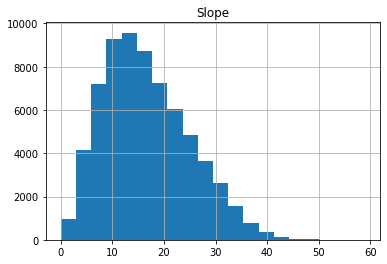

Mean of the Slope Feature is 16.453 and the Median is 15.000


In [9]:
df.hist(column='Slope',bins=20);
plt.show()
print('Mean of the Slope Feature is %.3f and the Median is %.3f'%(df['Slope'].mean(),df['Slope'].median()))

From the above histogram we can see that the slope feature is positively skewed (Mean>Median). A skewed histogram suggests adopting the median as the method for imputation, where as a normal distribution leans towards adopting the mean. Hence we will adopt to imputing mean as the replacing value for the missing datapoints

First we will make the missing values 0 to NaN values in the Slope column

In [10]:
df[df['Slope']==0]['Slope'].value_counts()

0.0    55
Name: Slope, dtype: int64

In [11]:
df['Slope'].isnull().sum()

5325

There are 55 - '0' values and 5325 - 'NaN' in Slope column, first we will change all zeroes in to NaN

In [11]:
df['Slope'].replace(0,np.NaN,inplace=True)

In [12]:
df[df['Slope']==0]['Slope'].value_counts()

Series([], Name: Slope, dtype: int64)

In [13]:
df['Slope'].isnull().sum()

5380

In [14]:
from sklearn.preprocessing import Imputer

In [15]:
median_imputer = Imputer(missing_values='NaN', strategy='median', axis=0)

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
df['Slope']= median_imputer.fit_transform(df[['Slope']])

In [17]:
df['Slope'].isnull().sum()

0

In [18]:
df.isnull().sum()

Elevation                             4311
Aspect                                  71
Slope                                    0
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        570
Hillshade_9am                          128
Hillshade_Noon                        2750
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points     995
Wilderness_Area1                      5037
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

From the above results we can see that all the missing values in the slope column is successfully imputed by its median and there aren't any missing values

In [19]:
# likewise will first change call the values of 0 into NaN for all numerical columns
df['Aspect'].replace(0,np.NaN,inplace=True)
df['Horizontal_Distance_To_Roadways'].replace(0,np.NaN,inplace=True)
df['Hillshade_9am'].replace(0,np.NaN,inplace=True)
df['Hillshade_3pm'].replace(0,np.NaN,inplace=True)
df['Horizontal_Distance_To_Fire_Points'].replace(0,np.NaN,inplace=True)

In [20]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,68107.000000,71814.000000,72418.000000,71528.000000,71574.000000,71813.000000,72287.00000,69668.000000,72052.000000,71411.000000,67381.000000,72418.000000,71406.000000,72418.000000
mean,2798.299162,161.182444,16.357563,241.501943,52.383617,1794.288137,210.11280,219.006072,139.047216,1569.975774,0.250293,0.036773,0.465185,0.247853
std,405.726869,112.319185,8.096361,209.715657,61.133222,1358.644423,31.32157,23.155369,43.898314,1115.360668,0.433185,0.188204,0.498790,0.431769
min,1859.000000,1.000000,1.000000,0.000000,-157.000000,30.000000,54.00000,63.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,2457.000000,64.000000,10.000000,85.000000,7.000000,778.000000,193.00000,207.000000,111.000000,767.000000,0.000000,0.000000,0.000000,0.000000
50%,2798.000000,131.000000,15.000000,192.000000,35.000000,1406.000000,217.00000,223.000000,141.000000,1315.000000,0.000000,0.000000,0.000000,0.000000
75%,3160.000000,274.000000,21.000000,339.000000,80.000000,2447.000000,233.00000,236.000000,170.000000,2081.000000,1.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,59.000000,1320.000000,590.000000,7092.000000,254.00000,254.000000,252.000000,7062.000000,1.000000,1.000000,1.000000,1.000000


Now we will impute the mostFrequent for Wilderness_Area1,Hillshade_Noon and Horizontal_Distance_To_Hydrology Feature

In [21]:
df.isnull().sum()

Elevation                             4311
Aspect                                 604
Slope                                    0
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        605
Hillshade_9am                          131
Hillshade_Noon                        2750
Hillshade_3pm                          366
Horizontal_Distance_To_Fire_Points    1007
Wilderness_Area1                      5037
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

In [22]:
df['Wilderness_Area1'].value_counts()

0.0    50516
1.0    16865
Name: Wilderness_Area1, dtype: int64

In [23]:
df['Wilderness_Area1'].isnull().sum()

5037

In [24]:
freq_imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
df['Wilderness_Area1']= freq_imputer.fit_transform(df[['Wilderness_Area1']])

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
df['Wilderness_Area1'].value_counts()

0.0    55553
1.0    16865
Name: Wilderness_Area1, dtype: int64

In [26]:
df['Wilderness_Area1'].isnull().sum()

0

In [27]:
df.isnull().sum()

Elevation                             4311
Aspect                                 604
Slope                                    0
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        605
Hillshade_9am                          131
Hillshade_Noon                        2750
Hillshade_3pm                          366
Horizontal_Distance_To_Fire_Points    1007
Wilderness_Area1                         0
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

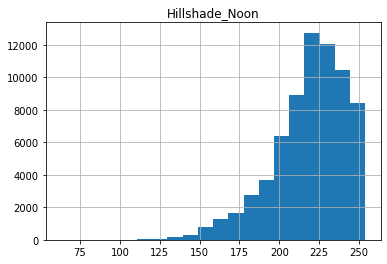

Mean of the Hillshade_Noon Feature is 219.006 and the Median is 223.000


In [28]:
df.hist(column='Hillshade_Noon',bins=20);
plt.show()
print('Mean of the Hillshade_Noon Feature is %.3f and the Median is %.3f'%(df['Hillshade_Noon'].mean(),df['Hillshade_Noon'].median()))

In [29]:
median_imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
df['Hillshade_Noon']= median_imputer.fit_transform(df[['Hillshade_Noon']])

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
df.isnull().sum()

Elevation                             4311
Aspect                                 604
Slope                                    0
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        605
Hillshade_9am                          131
Hillshade_Noon                           0
Hillshade_3pm                          366
Horizontal_Distance_To_Fire_Points    1007
Wilderness_Area1                         0
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

Now we will remove the missing values of the remaining features

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Cover_Type                            0
soil                                  0
dtype: int64

In [35]:
df[df.duplicated()].count()

Elevation                             2784
Aspect                                2784
Slope                                 2784
Horizontal_Distance_To_Hydrology      2784
Vertical_Distance_To_Hydrology        2784
Horizontal_Distance_To_Roadways       2784
Hillshade_9am                         2784
Hillshade_Noon                        2784
Hillshade_3pm                         2784
Horizontal_Distance_To_Fire_Points    2784
Wilderness_Area1                      2784
Wilderness_Area2                      2784
Wilderness_Area3                      2784
Wilderness_Area4                      2784
Cover_Type                            2784
soil                                  2784
dtype: int64

From above we can see that there are 2,784 rows are duplicate rows whcih needs to be removed

### 2. Dropping Duplicate rows

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df[df.duplicated()].count()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Cover_Type                            0
soil                                  0
dtype: int64

In [38]:
df.shape

(60261, 16)

As we can see all the missing values are dropped and after dropping out dataframe shape reduced to 60261,16

### 3.Categorical data transformation by using One-Hot Encoding

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60261 entries, 1 to 72417
Data columns (total 16 columns):
Elevation                             60261 non-null float64
Aspect                                60261 non-null float64
Slope                                 60261 non-null float64
Horizontal_Distance_To_Hydrology      60261 non-null float64
Vertical_Distance_To_Hydrology        60261 non-null float64
Horizontal_Distance_To_Roadways       60261 non-null float64
Hillshade_9am                         60261 non-null float64
Hillshade_Noon                        60261 non-null float64
Hillshade_3pm                         60261 non-null float64
Horizontal_Distance_To_Fire_Points    60261 non-null float64
Wilderness_Area1                      60261 non-null float64
Wilderness_Area2                      60261 non-null int64
Wilderness_Area3                      60261 non-null float64
Wilderness_Area4                      60261 non-null int64
Cover_Type                            602

Here the Dependent variable is the Forest Cover type ('Cover_Type') which is a type of cover will occupy the area based on all the independent features

In [40]:
df['Cover_Type'].unique()

array(['Douglas-fir', 'Krummholz', 'Cottonwood/Willow', 'Spruce/Fir',
       'Aspen', 'Ponderosa Pine', 'Lodgepole Pine'], dtype=object)

There are 7 different types of Forest covers(Multi classification)

In [41]:
df['soil'].unique()

array(['Soil_Type20', 'Soil_Type29', 'Soil_Type38', 'Soil_Type1',
       'Soil_Type10', 'Soil_Type3', 'Soil_Type13', 'Soil_Type22',
       'Soil_Type31', 'Soil_Type4', 'Soil_Type2', 'Soil_Type24',
       'Soil_Type16', 'Soil_Type23', 'Soil_Type17', 'Soil_Type30',
       'Soil_Type32', 'Soil_Type34', 'Soil_Type40', 'Soil_Type33',
       'Soil_Type39', 'Soil_Type35', 'Soil_Type12', 'Soil_Type19',
       'Soil_Type37', 'Soil_Type6', 'Soil_Type14', 'Soil_Type5',
       'Soil_Type11', 'Soil_Type9', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type36', 'Soil_Type26', 'Soil_Type25', 'Soil_Type18',
       'Soil_Type21', 'Soil_Type8', 'Soil_Type7'], dtype=object)

There are 39 diferent types of soil 

both of these features represents the categorical nature of its values (Nominal), which needs to be converted into Numerical as most of the Machine learning models understands only the numbers. But we will consider one-Hot encoding for Soil type only and not for Cover_type as its the target feature but we will just convert it to numerical

In [42]:
#One-Hot Encoding
df1= pd.get_dummies(df['soil'])

In [43]:
display(df1.head())

,Soil_Type1,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df= pd.concat([df,df1],axis=1)

In [45]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164.0,1290.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110.0,2911.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189.0,1952.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209.0,722.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,169.0,700.0,...,0,0,0,0,0,0,0,0,0,0


We will convert the Cover_type string categorical column into Numerical values by mapping

In [46]:
df['Cover_Type'].value_counts()

Ponderosa Pine       11347
Spruce/Fir           10453
Douglas-fir          10066
Krummholz             9446
Lodgepole Pine        8720
Aspen                 7833
Cottonwood/Willow     2396
Name: Cover_Type, dtype: int64

In [47]:
df['Cover_Type']=df['Cover_Type'].map({'Spruce/Fir':1,'Lodgepole Pine':2,'Ponderosa Pine':3,'Cottonwood/Willow':4, 'Aspen':5,'Douglas-fir':6,'Krummholz':7})

In [48]:
df['Cover_Type'].value_counts()

3    11347
1    10453
6    10066
7     9446
2     8720
5     7833
4     2396
Name: Cover_Type, dtype: int64

Now we have to remove the soil column which has been converted into dummy variables

In [5]:
df.drop('soil',axis=1,inplace=True)

KeyError: "['soil'] not found in axis"

In [50]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164.0,1290.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110.0,2911.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189.0,1952.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209.0,722.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,169.0,700.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60261 entries, 1 to 72417
Data columns (total 54 columns):
Elevation                             60261 non-null float64
Aspect                                60261 non-null float64
Slope                                 60261 non-null float64
Horizontal_Distance_To_Hydrology      60261 non-null float64
Vertical_Distance_To_Hydrology        60261 non-null float64
Horizontal_Distance_To_Roadways       60261 non-null float64
Hillshade_9am                         60261 non-null float64
Hillshade_Noon                        60261 non-null float64
Hillshade_3pm                         60261 non-null float64
Horizontal_Distance_To_Fire_Points    60261 non-null float64
Wilderness_Area1                      60261 non-null float64
Wilderness_Area2                      60261 non-null int64
Wilderness_Area3                      60261 non-null float64
Wilderness_Area4                      60261 non-null int64
Cover_Type                            602

As we can see above now all the features are convereted to numerical suitable for buildinng a Machine learning models

# Checking the balancing of Dataset

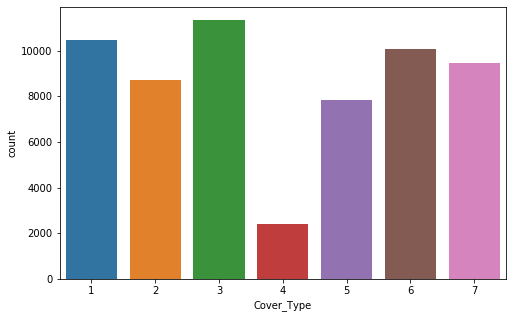

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(df['Cover_Type']);

From the above count plot we can see that the cover type of 4 is less when compared with the other cover types, which leads to conclusion that it is not a balanced dataset

In [53]:
df.to_csv('processingdonecovtype.csv')

In [2]:
df= pd.read_csv('processingdonecovtype.csv',index_col=0)

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164.0,1290.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110.0,2911.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189.0,1952.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209.0,722.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,169.0,700.0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory  Data Analysis

### Checking for multicollinearity and identifying the insignificant Features 

In [83]:
eda= df.copy()
xvar=eda.loc[:,'Elevation':'Wilderness_Area4']
yvar=eda['Cover_Type']
edadf=pd.concat([xvar,yvar],axis=1)

In [116]:
#identifying insignificant Features
def coefpval(x,y):
    x=x[x.corr().columns]
    from scipy import stats
    ls=[]
    for i in range(x.shape[1]):
        ls.append(stats.pearsonr(x.iloc[:,i], y)  )
    copv=pd.DataFrame(ls,index=x.columns,columns= ['Pearson-Coeff','P-Value'])
    copv['P-Ind'] = pd.cut(copv['P-Value'], bins =[0, 0.001, 0.05,0.1, 1.0], labels=['Strong','Moderate','Weak','Insignificant'], include_lowest=True )
    copv['C-Ind'] = pd.cut(copv['Pearson-Coeff'], bins =[-1.0,0, 1.0], labels=['Negative','Positive'], include_lowest=True )
    
    return copv

# Function of multi-Correlation
def multicorrelation(data, threshold=0.80):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    
    print('  \n    Correlation with more than :',threshold)
    print('\n\nCorr Value',"\t""\t", 'Fearture1', "\t\t\t", 'Feature 2')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.iloc[i, j], "\t", corr_matrix.columns[i], "\t" "\t\t", corr_matrix.columns[j])
                     
    print('\n\n The above mentioned correlations only are present in the given Dataset')

In [91]:
coefpval(edadf,yvar)

,Pearson-Coeff,P-Value,P-Ind,C-Ind
Elevation,0.005486,1.781083e-01,Insignificant,Positive
Aspect,0.007390,6.967663e-02,Weak,Positive
Slope,0.082111,1.188489e-90,Strong,Positive
Horizontal_Distance_To_Hydrology,0.004297,2.915222e-01,Insignificant,Positive
Vertical_Distance_To_Hydrology,0.081518,2.271071e-89,Strong,Positive
Horizontal_Distance_To_Roadways,-0.106410,2.982520e-151,Strong,Negative
Hillshade_9am,-0.021176,2.006148e-07,Strong,Negative
Hillshade_Noon,-0.103165,3.071473e-142,Strong,Negative
Hillshade_3pm,-0.048902,3.092508e-33,Strong,Negative
Horizontal_Distance_To_Fire_Points,-0.086493,2.069826e-100,Strong,Negative


From the above results we can see that Elevation, Horizontal_Distance_To_Hydrology, Wilderness_Area2 are the 3 insignificant Features with respect to the target variable

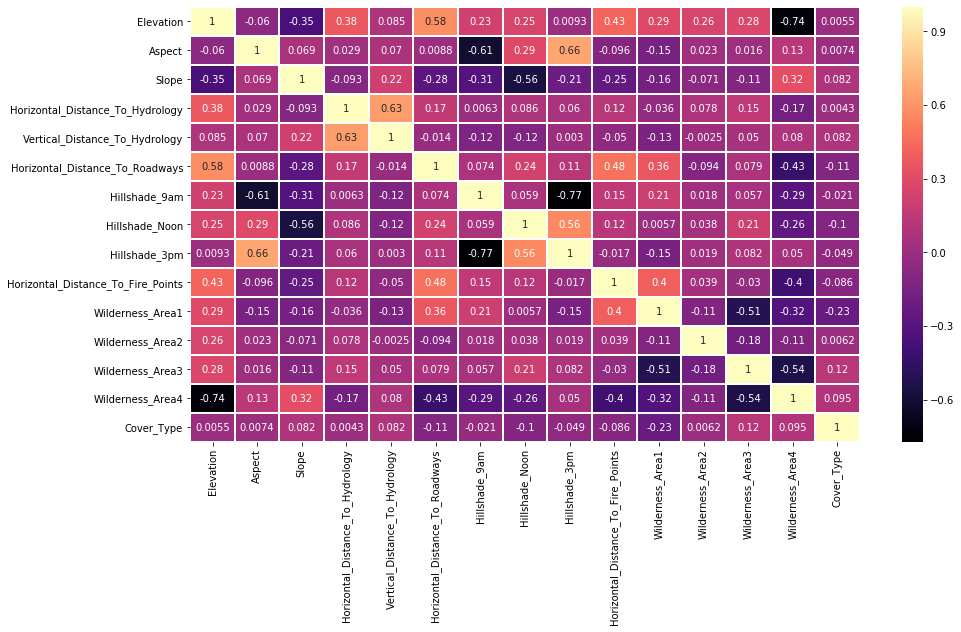

In [94]:
plt.figure(figsize=(15,8))
sns.heatmap(edadf.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

From the above heatmap we can see a lot of multicollinearity between the independent variables, lets see what are those variables below:

In [120]:
multicorrelation(edadf,0.65)

  
    Correlation with more than : 0.65


Corr Value 		 Fearture1 			 Feature 2
0.6645240742528696 	 Hillshade_3pm 			 Aspect
-0.7720290497126205 	 Hillshade_3pm 			 Hillshade_9am
-0.737082769552578 	 Wilderness_Area4 			 Elevation


 The above mentioned correlations only are present in the given Dataset


Hence if we drop the Hillshade_3pm it will break two multicollinearities 

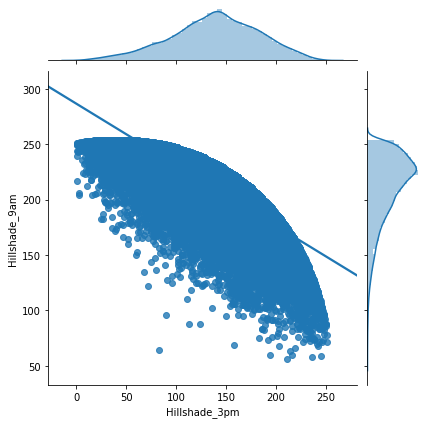

In [144]:
sns.jointplot('Hillshade_3pm','Hillshade_9am',data=df,kind='reg')

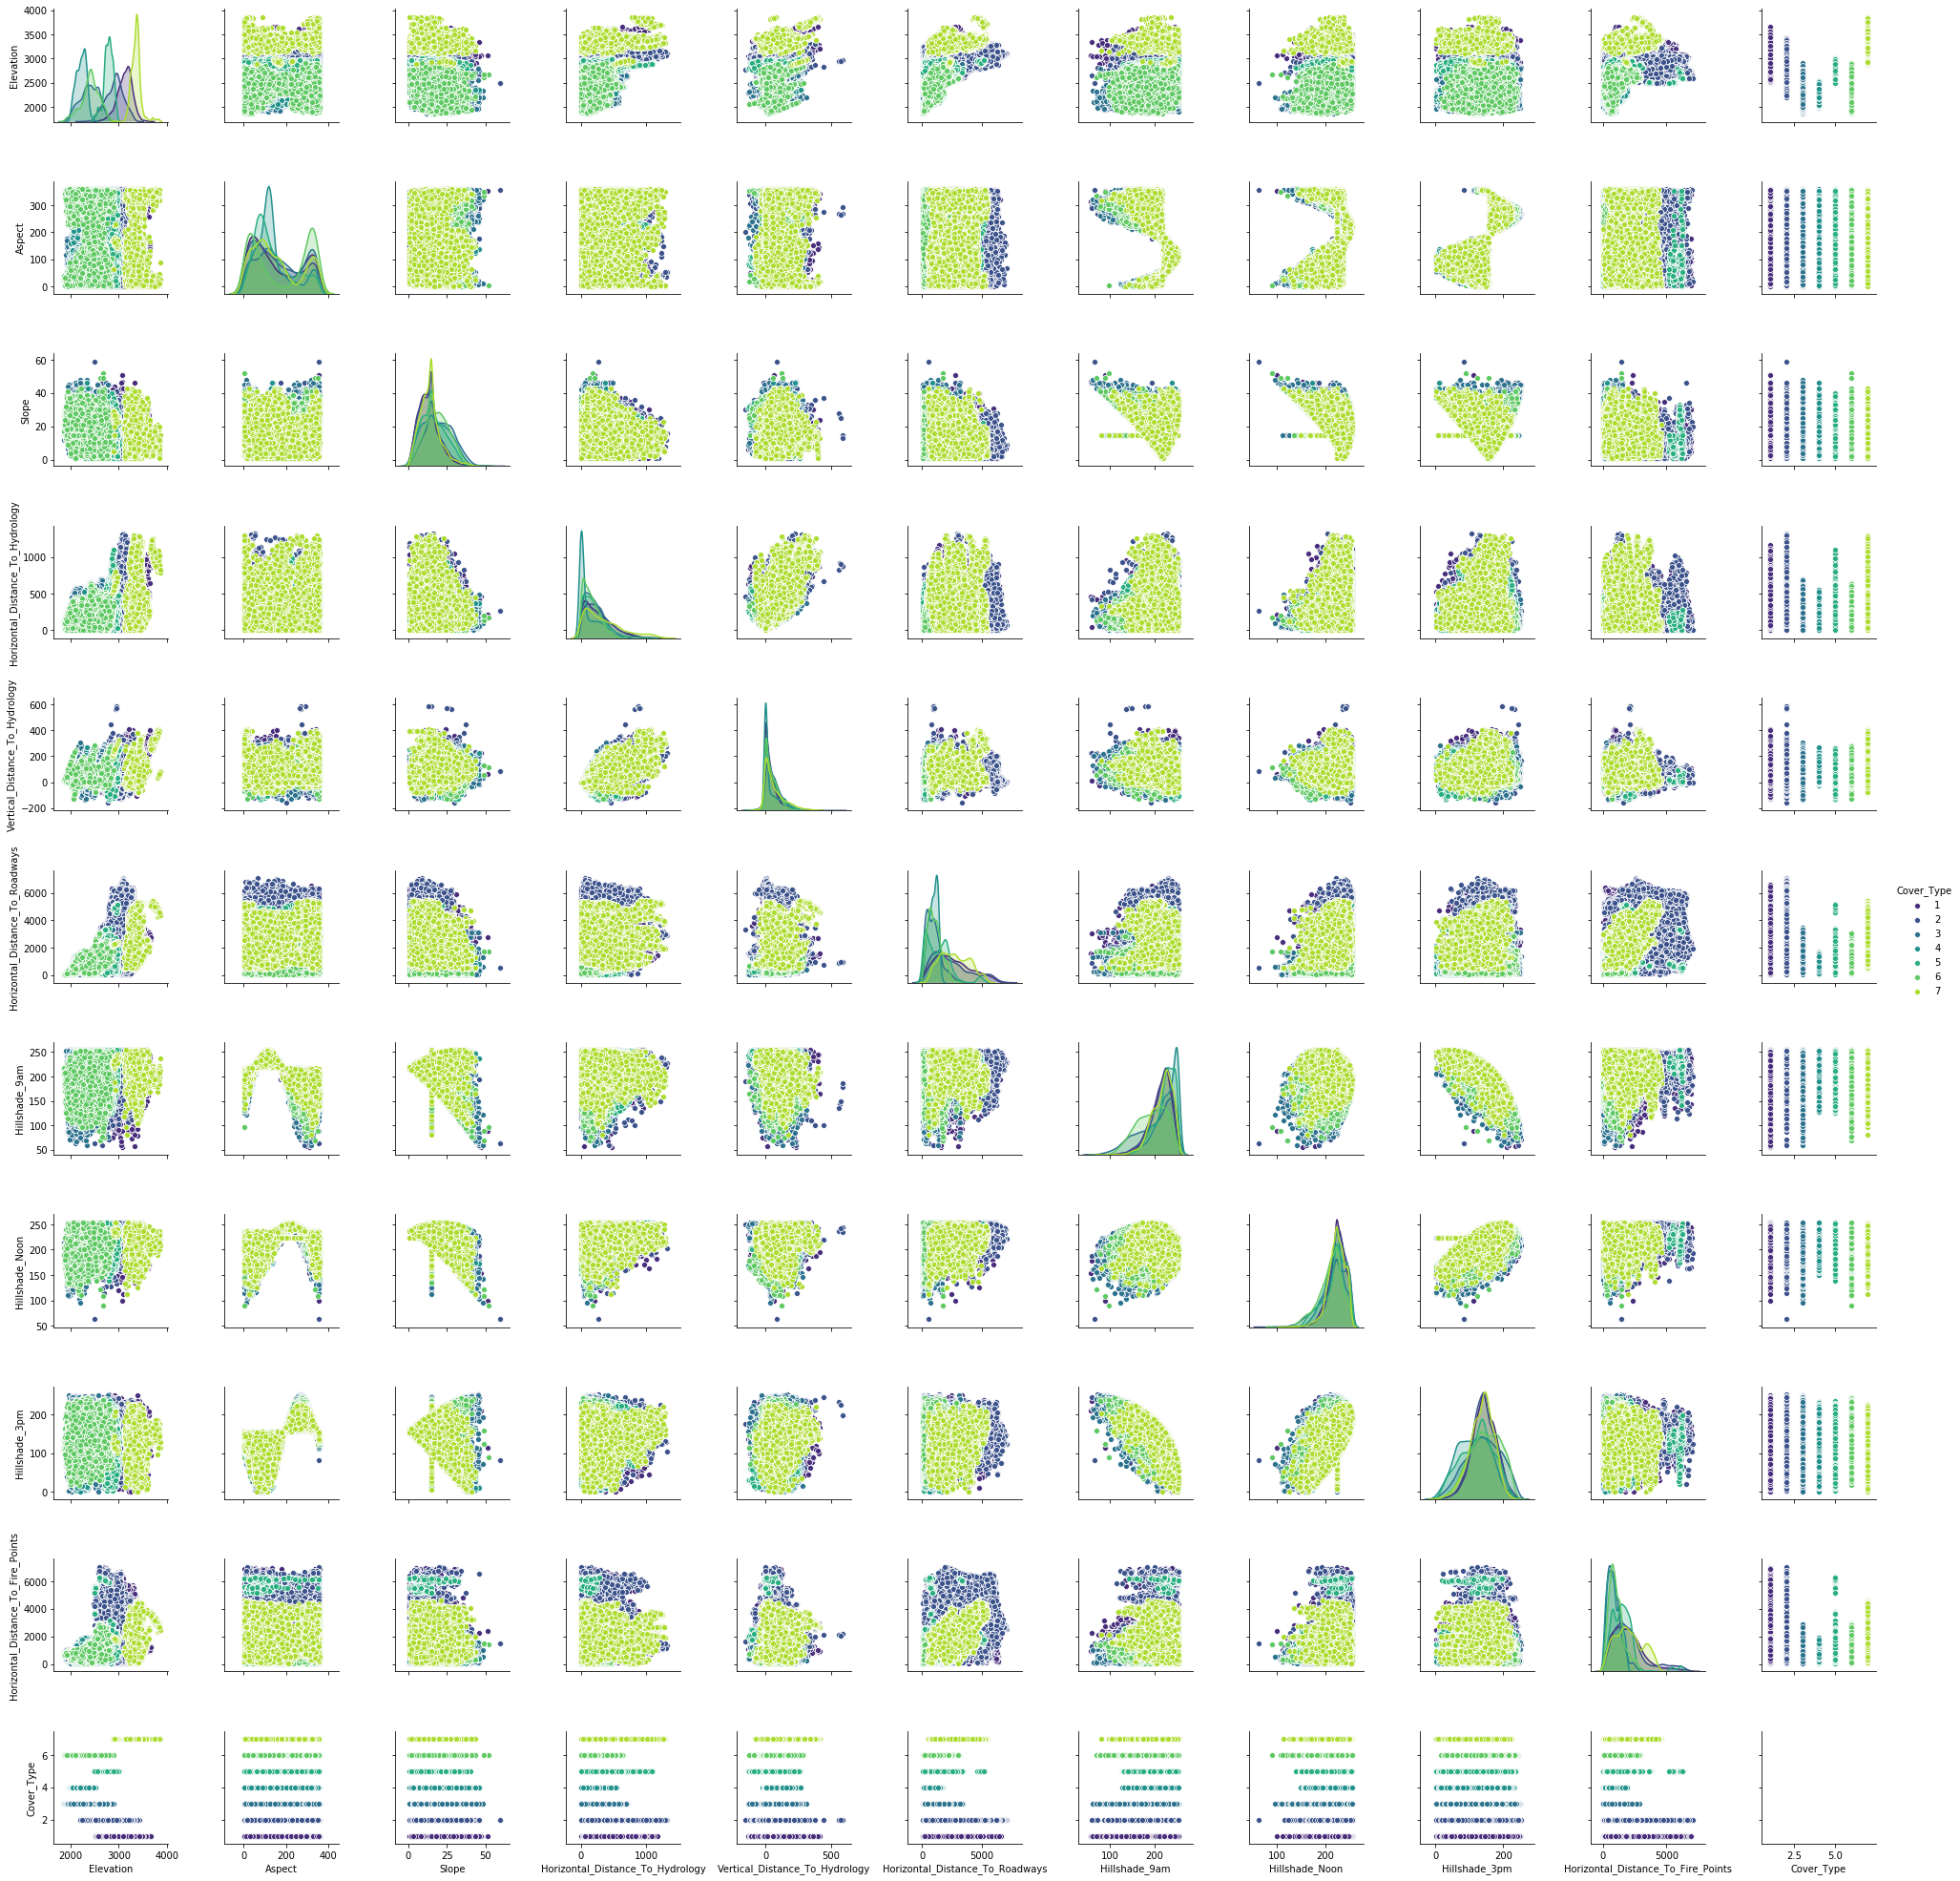

In [130]:
xvar1= edadf.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
yvar1= edadf['Cover_Type']
paiplt=pd.concat([xvar1,yvar1],axis=1)
sns.pairplot(paiplt,hue='Cover_Type',palette='viridis')

From above plot we can see an overview that Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points can seperate the data well. Lets see in detail below

In [134]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164.0,1290.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110.0,2911.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189.0,1952.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209.0,722.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,169.0,700.0,...,0,0,0,0,0,0,0,0,0,0


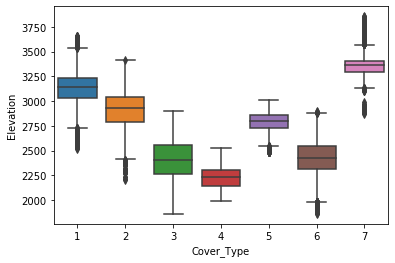

In [135]:
sns.boxplot('Cover_Type','Elevation',data=df)

as we can see above the Elevation feature's data didn't overlap with each other much and shows variations in data for all types of Forest covers, hence this will be a good feature to classify the datapoints

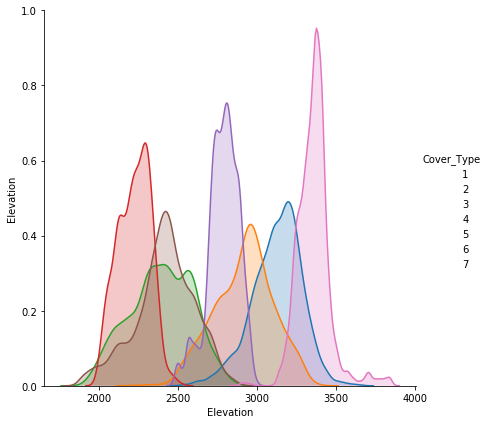

In [159]:
sns.pairplot(x_vars='Elevation',y_vars='Elevation',hue='Cover_Type',data=df,size=6,height=5)
plt.show()

From above we can see that the distribution of Elevation Feature over the Cover types which can show that all the covertypes are having different distributions

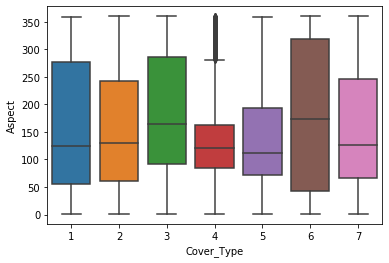

In [136]:
sns.boxplot('Cover_Type','Aspect',data=df)

Here there isn't much of a variation between the cover types and all data are overlapping on one another

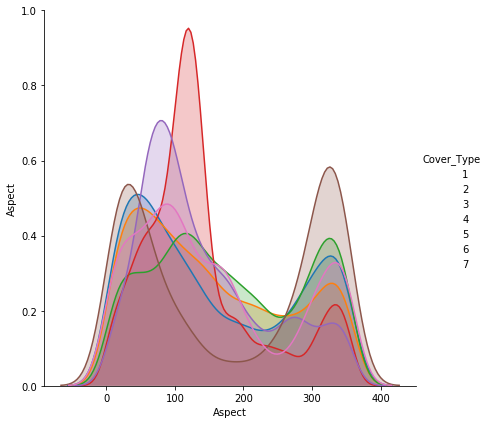

In [160]:
sns.pairplot(x_vars='Aspect',y_vars='Aspect',hue='Cover_Type',data=df,size=6,height=5)
plt.show()

As an evident all the covertypes are overlapped with each other and it wil be hard to cite the particular type based on this Aspect Feature

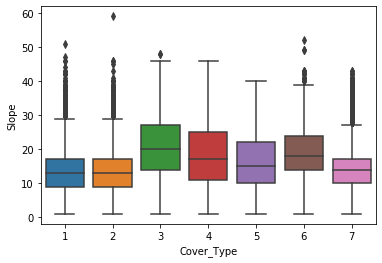

In [143]:
sns.boxplot('Cover_Type','Slope',data=df)

Even in Slope feature all the data points are overlapping with each other and hard to classify the data based on this feature

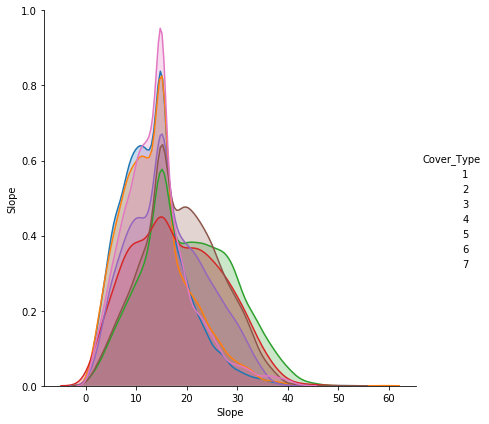

In [161]:
sns.pairplot(x_vars='Slope',y_vars='Slope',hue='Cover_Type',data=df,size=6,height=5)
plt.show()

Hence we finally decise to take out the Hillshade_3pm feature alone to remove the multicollinearity 

In [4]:
df.drop('Hillshade_3pm',axis=1,inplace=True)

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,1290.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,2911.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,1952.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,722.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,700.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(60261, 53)

# Model Evaluation strategy (Metrics Selection)

From the Objective of Model building we can infer that we cannot tolerate False Negatives when compared with False Positives   

(ie) if we predicted that a certain tree can be grown in that specific area and we made efforts to sow the seeds and atlast
it didnt grow at all as its incorrectly predicted(False Negatives) will lead to waste of effort and money whcih is not tolerable rather than if we predicted it wont grow in the particular area.    

Hence this problem is a Recall-Oriented model and will be using both ROC and Precison-Recall
curve to establish a clear model by using AUC score (As it will be a good predictor in both ROC and Presision-recall curves)

And we will be averaging all the recall scores based on Micro method as we are having imbalanced dataset  we need to give equal weights to instances rather than equal weight to classes

In [7]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,recall_score,roc_auc_score
from sklearn.metrics import roc_curve,precision_score,f1_score

# Data Partitioning

In [8]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,1290.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,2911.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,1952.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,722.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,700.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x=df.drop('Cover_Type',axis=1)
y=df['Cover_Type']

In [10]:
print(df.shape, x.shape, y.shape)

(60261, 53) (60261, 52) (60261,)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Here we will split the data based on Stratification method so that to preserve the distribution of classes 
# in both train and test set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42,stratify =y)

In [13]:
print(x_train.shape,y_train.shape)

(42182, 52) (42182,)


In [14]:
print(x_test.shape,y_test.shape)

(18079, 52) (18079,)


# Feature Scaling

There are various methods of scaling such as MinMaxScaling, StandardScaler, Normalizer , MaxAbsScaler , RobustScaler and Normalizer

But here we will be using MinMaxScaler as we need to preserve the distribution of each class in data but incase of Standard scaler it will assume all features is normally distributed and make them similar which won't be helpful in this case as we need to classify the datapoints.
And the only disadvantage of MinMaxScaler is it can be afftected by outliers but as we are not going to do any Regression models over the classification problems it will not affect our models

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scale= MinMaxScaler()

In [17]:
scale.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
x_train_sc=scale.transform(x_train)
x_test_sc=scale.transform(x_test)

In [19]:
print(x_train_sc.shape,x_test_sc.shape)

(42182, 52) (18079, 52)


# Dummy classifiers as a sanity check Baseline (Null Accuracy)

In [26]:
from sklearn.dummy import DummyClassifier #stratified method is used to preserve the class distribution 
dumbmodel = DummyClassifier(strategy = 'stratified' , random_state = 42 )
dumbmodel.fit(x_train_sc, y_train)
pred_stratified = dumbmodel.predict(x_test_sc)
print('\nThe Dummy classifier train score is:  ',dumbmodel.score(x_train_sc,y_train).round(5))
print('\nThe Dummy classifier test score is:  ',dumbmodel.score(x_test_sc,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,pred_stratified,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,pred_stratified))
print('   micro avg\t  ',precision_score(y_test, pred_stratified, average='micro').round(2),'    ',recall_score(y_test, pred_stratified, average='micro').round(2),'    ',
      f1_score(y_test, pred_stratified, average='micro').round(2) )


The Dummy classifier train score is:   0.16085

The Dummy classifier test score is:   0.15847

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,516,444,590,128,401,525,532
2,465,394,442,117,336,463,399
3,562,490,645,156,464,553,534
4,106,91,145,30,94,124,129
5,413,330,437,96,311,380,383
6,523,465,537,128,390,516,461
7,506,389,512,129,366,479,453



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.17      0.16      0.17      3136
           2       0.15      0.15      0.15      2616
           3       0.19      0.19      0.19      3404
           4       0.04      0.04      0.04       719
           5       0.13      0.13      0.13      2350
           6       0.17      0.17      0.17      3020
           7       0.16      0.16      0.16      2834

    accuracy                           0.16     18079
   macro avg       0.14      0.14      0.14     18079
weighted avg       0.16      0.16      0.16     18079

   micro avg	   0.16      0.16      0.16


Any Model is expected to outperform this Baseline model with an accuracy score of 0.15847(dumb model) whcih serves as a performance evaluation

# K Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [36]:
train_cv_array=[]
train_score_array = []
test_score_array = []
for k in [1,2,3,5,8,10,12]:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, x_train_sc, y_train, cv=5)
    print('\nFor k =',k)
    print('\nCross validation Training score mean:',scores.mean())
    knn.fit(x_train_sc,y_train)
    y_pred=knn.predict(x_test_sc)
    train_score_array.append(knn.score(x_train_sc,y_train).round(5))
    test_score_array.append(knn.score(x_test_sc,y_test).round(5))
    train_cv_array.append(scores.mean())
    print('Training score without CV:',knn.score(x_train_sc,y_train).round(5))
    print('Test score -->',knn.score(x_test_sc,y_test).round(5))
    print('\nThe Confusion Matrix is plotted below:')
    display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
    print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
    print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
          f1_score(y_test, y_pred, average='micro').round(2) )
    print('--------------------------------------------------------------------------')
    


For k = 1

Cross validation Training score mean: 0.8512633836860918
Training score without CV: 1.0
Test score --> 0.86382

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2529,423,1,0,40,12,131
2,443,1877,34,1,184,60,17
3,1,19,2928,85,21,350,0
4,0,0,73,603,0,43,0
5,17,47,18,0,2251,17,0
6,4,21,285,30,23,2657,0
7,56,4,0,0,2,0,2772



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.83      0.81      0.82      3136
           2       0.79      0.72      0.75      2616
           3       0.88      0.86      0.87      3404
           4       0.84      0.84      0.84       719
           5       0.89      0.96      0.92      2350
           6       0.85      0.88      0.86      3020
           7       0.95      0.98      0.96      2834

    accuracy                           0.86     18079
   macro avg       0.86      0.86      0.86     18079
weighted avg       0.86      0.86      0.86     18079

   micro avg	   0.86      0.86      0.86
--------------------------------------------------------------------------

For k = 2

Cross validation Training score mean: 0.8334119514992301
Training score without CV: 0.94106
Test score --> 0.84678

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2797,217,2,0,28,7,85
2,803,1595,33,0,131,43,11
3,3,50,3110,49,15,177,0
4,0,1,136,566,0,16,0
5,44,110,37,0,2154,5,0
6,7,48,492,47,36,2390,0
7,125,10,0,0,2,0,2697



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.74      0.89      0.81      3136
           2       0.79      0.61      0.69      2616
           3       0.82      0.91      0.86      3404
           4       0.85      0.79      0.82       719
           5       0.91      0.92      0.91      2350
           6       0.91      0.79      0.84      3020
           7       0.97      0.95      0.96      2834

    accuracy                           0.85     18079
   macro avg       0.85      0.84      0.84     18079
weighted avg       0.85      0.85      0.84     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For k = 3

Cross validation Training score mean: 0.8406663870052047
Training score without CV: 0.92665
Test score --> 0.85331

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2490,410,2,0,56,11,167
2,507,1770,45,1,206,66,21
3,1,19,2887,76,28,393,0
4,0,2,91,593,0,33,0
5,25,47,25,0,2237,16,0
6,3,24,271,28,16,2678,0
7,55,4,0,0,3,0,2772



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.81      0.79      0.80      3136
           2       0.78      0.68      0.72      2616
           3       0.87      0.85      0.86      3404
           4       0.85      0.82      0.84       719
           5       0.88      0.95      0.91      2350
           6       0.84      0.89      0.86      3020
           7       0.94      0.98      0.96      2834

    accuracy                           0.85     18079
   macro avg       0.85      0.85      0.85     18079
weighted avg       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For k = 5

Cross validation Training score mean: 0.83115954456136
Training score without CV: 0.8969
Test score --> 0.84557

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2449,424,3,0,62,14,184
2,488,1735,52,2,240,76,23
3,0,9,2852,78,30,435,0
4,0,1,89,588,0,41,0
5,20,39,31,0,2241,19,0
6,3,21,272,41,26,2657,0
7,59,6,0,0,4,0,2765



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.81      0.78      0.80      3136
           2       0.78      0.66      0.72      2616
           3       0.86      0.84      0.85      3404
           4       0.83      0.82      0.82       719
           5       0.86      0.95      0.90      2350
           6       0.82      0.88      0.85      3020
           7       0.93      0.98      0.95      2834

    accuracy                           0.85     18079
   macro avg       0.84      0.84      0.84     18079
weighted avg       0.84      0.85      0.84     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For k = 8

Cross validation Training score mean: 0.8195917425158946
Training score without CV: 0.87293
Test score --> 0.83163

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2496,350,2,0,87,16,185
2,611,1569,49,0,271,87,29
3,0,12,2873,78,26,414,1
4,0,0,109,570,0,40,0
5,24,46,44,0,2204,31,1
6,5,19,337,44,28,2587,0
7,86,8,0,0,4,0,2736



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.77      0.80      0.79      3136
           2       0.78      0.60      0.68      2616
           3       0.84      0.84      0.84      3404
           4       0.82      0.79      0.81       719
           5       0.84      0.94      0.89      2350
           6       0.81      0.86      0.84      3020
           7       0.93      0.97      0.95      2834

    accuracy                           0.83     18079
   macro avg       0.83      0.83      0.83     18079
weighted avg       0.83      0.83      0.83     18079

   micro avg	   0.83      0.83      0.83
--------------------------------------------------------------------------

For k = 10

Cross validation Training score mean: 0.8116496311494027
Training score without CV: 0.85887
Test score --> 0.82355

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2432,354,4,0,110,18,218
2,605,1538,59,0,290,95,29
3,0,11,2827,80,28,457,1
4,0,0,105,564,0,50,0
5,24,46,44,0,2203,31,2
6,4,18,332,48,29,2589,0
7,87,7,0,0,4,0,2736



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.77      0.78      0.77      3136
           2       0.78      0.59      0.67      2616
           3       0.84      0.83      0.83      3404
           4       0.82      0.78      0.80       719
           5       0.83      0.94      0.88      2350
           6       0.80      0.86      0.83      3020
           7       0.92      0.97      0.94      2834

    accuracy                           0.82     18079
   macro avg       0.82      0.82      0.82     18079
weighted avg       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For k = 12

Cross validation Training score mean: 0.8040398661642734
Training score without CV: 0.84825
Test score --> 0.8178

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2414,367,3,0,112,19,221
2,606,1514,62,0,307,93,34
3,0,8,2791,82,30,493,0
4,0,0,105,563,0,51,0
5,29,51,42,0,2195,31,2
6,4,20,343,45,28,2580,0
7,97,4,0,0,5,0,2728



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.77      0.77      0.77      3136
           2       0.77      0.58      0.66      2616
           3       0.83      0.82      0.83      3404
           4       0.82      0.78      0.80       719
           5       0.82      0.93      0.87      2350
           6       0.79      0.85      0.82      3020
           7       0.91      0.96      0.94      2834

    accuracy                           0.82     18079
   macro avg       0.82      0.81      0.81     18079
weighted avg       0.82      0.82      0.81     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------


From above we can see that K=1 has the best accuracy score of 0.8638 and recall score of0.86 when compared with other k values, hence K=1 will be considered as the best estimator. lets visualize the same below

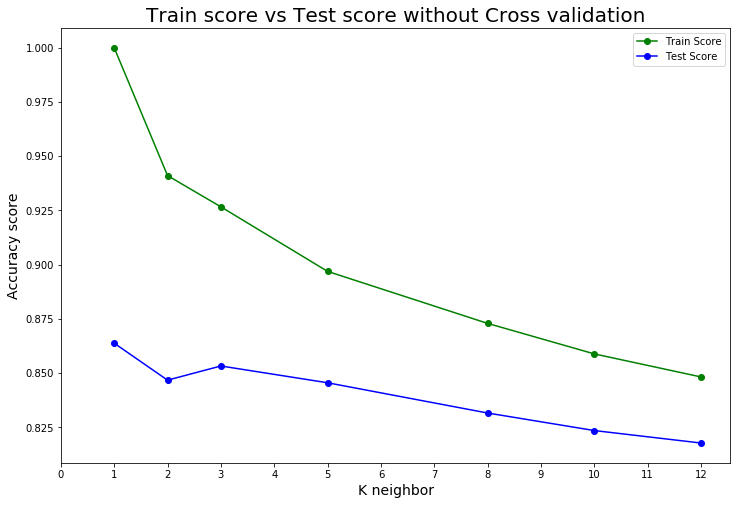

In [42]:
plt.figure(figsize=(12,8))
x_axis = [1,2,3,5,8,10,12]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('Train score vs Test score without Cross validation',fontsize=20)
plt.xlabel('K neighbor',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.xticks(np.arange(0, 13, 1))
plt.show()

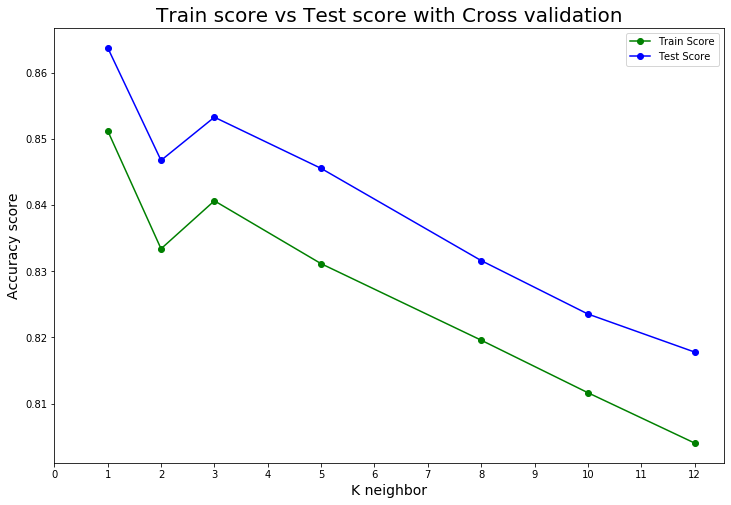

In [55]:
plt.figure(figsize=(12,8))
x_axis = [1,2,3,5,8,10,12]
plt.plot(x_axis, train_cv_array, c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('Train score vs Test score with Cross validation',fontsize=20)
plt.xlabel('K neighbor',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.xticks(np.arange(0, 13, 1))
plt.show()

From above we can see the true effect of Cross validation which generalizes almost in consistent with the test score, hence we can use the Cross validation scores alone to find the best parameters

#### Hyperparameter Selection using GridSearchCV

Lets find out the same beat parameter  via Grid searchCV

In [64]:
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':[1,2,3,5,8]}
knn=KNeighborsClassifier()
knngcv=GridSearchCV(estimator=knn,param_grid=param,return_train_score=True,cv=5,n_jobs=-1)
knngcv.fit(x_train_sc,y_train)
print("\nBest parameters: {}".format(knngcv.best_params_))
print("\nBest cross-validation score: {:.2f}\n\n".format(knngcv.best_score_))
results = pd.DataFrame(knngcv.cv_results_)
display(results.head())


Best parameters: {'n_neighbors': 1}

Best cross-validation score: 0.85




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.405625,2.189941,31.655312,2.952153,1,{'n_neighbors': 1},0.853199,0.853893,0.843765,0.852383,...,0.851264,0.003780,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,5.752420,1.710255,35.240411,3.377844,2,{'n_neighbors': 2},0.834242,0.838606,0.827525,0.831160,...,0.833412,0.003792,3,0.937259,0.935927,0.937652,0.937033,0.936887,0.936952,0.000574
2,7.187822,3.023659,41.500824,3.667759,3,{'n_neighbors': 3},0.839573,0.847375,0.833926,0.838748,...,0.840667,0.004573,2,0.920070,0.919509,0.921976,0.921329,0.919998,0.920576,0.000922
3,7.090206,2.218580,48.024205,1.778861,5,{'n_neighbors': 5},0.836493,0.833748,0.823257,0.830092,...,0.831160,0.004468,4,0.888981,0.889755,0.891217,0.890808,0.889597,0.890072,0.000821
4,6.379236,1.859711,48.450914,2.093283,8,{'n_neighbors': 8},0.818128,0.818936,0.817212,0.822030,...,0.819591,0.001920,5,0.860886,0.863527,0.864369,0.862392,0.863107,0.862856,0.001175


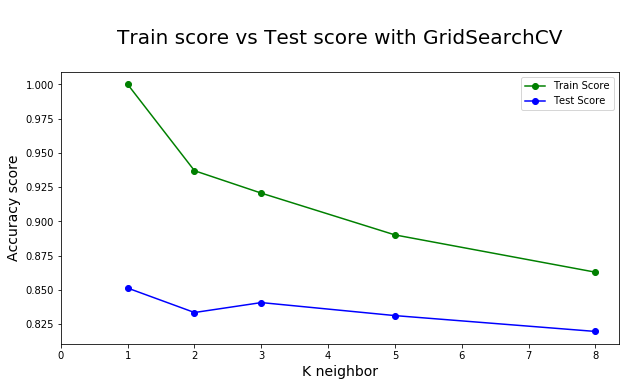

In [69]:
plt.figure(figsize=(10,5))
x_axis = results.param_n_neighbors
plt.plot(x_axis, results.mean_train_score , c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, results.mean_test_score, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('\nTrain score vs Test score with GridSearchCV\n',fontsize=20)
plt.xlabel('K neighbor',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.xticks(np.arange(0, 9, 1))
plt.show()

#### Train the model with the best parameter

In [73]:
knn=KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
scores = cross_val_score(knn, x_train_sc, y_train, cv=5)
print('\nFor k =',1)
print('\nThe corss validation scores for 5 folds is: ',scores)
print('\nCross validation Test score mean:',scores.mean())
knn.fit(x_train_sc,y_train)
y_pred=knn.predict(x_test_sc)
print('Training score without CV       :',knn.score(x_train_sc,y_train).round(5))
print('Test score without CV           :',knn.score(x_test_sc,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For k = 1

The corss validation scores for 5 folds is:  [0.85319905 0.85389264 0.84376482 0.85238321 0.8530772 ]

Cross validation Test score mean: 0.8512633836860918
Training score without CV       : 1.0
Test score without CV           : 0.86382

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2529,423,1,0,40,12,131
2,443,1877,34,1,184,60,17
3,1,19,2928,85,21,350,0
4,0,0,73,603,0,43,0
5,17,47,18,0,2251,17,0
6,4,21,285,30,23,2657,0
7,56,4,0,0,2,0,2772



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.83      0.81      0.82      3136
           2       0.79      0.72      0.75      2616
           3       0.88      0.86      0.87      3404
           4       0.84      0.84      0.84       719
           5       0.89      0.96      0.92      2350
           6       0.85      0.88      0.86      3020
           7       0.95      0.98      0.96      2834

    accuracy                           0.86     18079
   macro avg       0.86      0.86      0.86     18079
weighted avg       0.86      0.86      0.86     18079

   micro avg	   0.86      0.86      0.86
--------------------------------------------------------------------------


####  Plotting the decision region

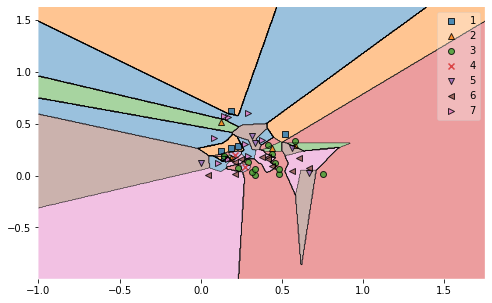

In [54]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train_sc[100:150,[2,5]]
y_b = y_train[100:150].values
knn = KNeighborsClassifier(1)
knn.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = knn)

#### As we have more number of classes the decision region looks vague but in case of binary classification it will be a nice representation, and moreover as this model is about multi class we cannot draw the ROC and Precisio-Revall curve instead we will keep an eye on the Classification Report's Recall and Precision values along with confusion matrix as metrics

# Logistic Regression

#### Hyperparameter Selection using GridSearchCV (using LBFGS as solver)

In [80]:
from sklearn.linear_model import LogisticRegression # using lbfgs as solver
param={'C':[0.01, 0.1, 1, 10,20,30,40,50]}
log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",n_jobs=-1,random_state=42,penalty='l2')
log_reg_gcv=GridSearchCV(estimator=log_reg,param_grid=param,return_train_score=True,cv=5,n_jobs=-1)
log_reg_gcv.fit(x_train_sc,y_train)
print("\nBest parameters: {}".format(log_reg_gcv.best_params_))
print("\nBest cross-validation score: {:.2f}\n\n".format(log_reg_gcv.best_score_))
results = pd.DataFrame(log_reg_gcv.cv_results_)
print('GridSearchCV Results table below:\n')
display(results.head(30))


Best parameters: {'C': 30}

Best cross-validation score: 0.68


GridSearchCV Results table below:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.595042,0.158890,0.012002,0.000004,0.01,{'C': 0.01},0.603199,0.612750,0.618184,0.610861,...,0.613271,0.006281,8,0.615939,0.615683,0.615569,0.616866,0.614329,0.615677,0.000814
1,19.686922,0.812385,0.012004,0.000002,0.1,{'C': 0.1},0.646445,0.649722,0.655287,0.644534,...,0.651795,0.006680,7,0.653666,0.653824,0.653322,0.654231,0.652079,0.653424,0.000734
2,18.416271,0.912745,0.012058,0.000109,1,{'C': 1},0.670853,0.671051,0.672119,0.667180,...,0.672941,0.005538,6,0.677464,0.674807,0.672317,0.674144,0.674005,0.674547,0.001674
3,16.964377,0.528538,0.011205,0.001601,10,{'C': 10},0.678318,0.679938,0.677691,0.673465,...,0.679010,0.003944,5,0.682532,0.681741,0.679340,0.681403,0.679131,0.680830,0.001354
4,18.721589,0.763492,0.010038,0.001791,20,{'C': 20},0.674645,0.679938,0.681958,0.675362,...,0.679721,0.004441,3,0.682058,0.681890,0.682244,0.682915,0.677620,0.681345,0.001895
5,19.708001,0.965821,0.012002,0.000003,30,{'C': 30},0.678081,0.682190,0.680654,0.675362,...,0.680859,0.004263,1,0.685970,0.683075,0.680614,0.680811,0.679279,0.681950,0.002351
6,19.154630,0.469285,0.012455,0.003291,40,{'C': 40},0.675711,0.682308,0.682195,0.676903,...,0.680456,0.003571,2,0.683273,0.683875,0.682629,0.682648,0.677531,0.681991,0.002277
7,21.787986,1.225771,0.010050,0.003097,50,{'C': 50},0.679265,0.676265,0.680062,0.674295,...,0.679437,0.004443,4,0.682710,0.680852,0.682096,0.682352,0.682183,0.682039,0.000629


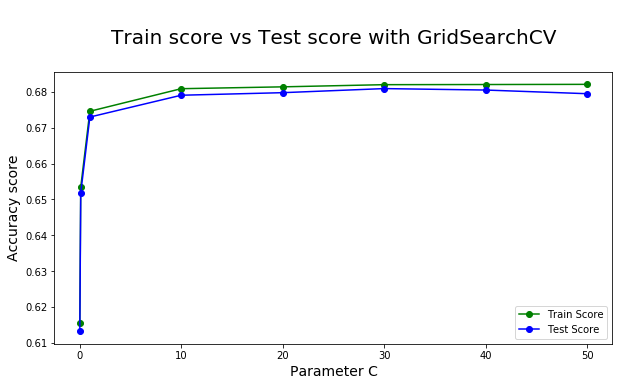

In [81]:
plt.figure(figsize=(10,5))
x_axis = results.param_C
plt.plot(x_axis, results.mean_train_score , c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, results.mean_test_score, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('\nTrain score vs Test score with GridSearchCV\n',fontsize=20)
plt.xlabel('Parameter C',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

#### Hyperparameter Selection using GridSearchCV (using LIBLINEAR as solver)

In [82]:
from sklearn.linear_model import LogisticRegression #using liblinear as solver
param={'C':[0.01, 0.1, 1, 10,20,30,40,50],'penalty':['l1','l2']}
log_reg = LogisticRegression(solver="liblinear",n_jobs=-1,random_state=42)
log_reg_gcv=GridSearchCV(estimator=log_reg,param_grid=param,return_train_score=True,cv=5,n_jobs=-1)
log_reg_gcv.fit(x_train_sc,y_train)
print("\nBest parameters: {}".format(log_reg_gcv.best_params_))
print("\nBest cross-validation score: {:.2f}\n\n".format(log_reg_gcv.best_score_))
results = pd.DataFrame(log_reg_gcv.cv_results_)
print('GridSearchCV Results table below:\n')
display(results.head(30))

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



Best parameters: {'C': 30, 'penalty': 'l1'}

Best cross-validation score: 0.65


GridSearchCV Results table below:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.228070,0.319700,0.015203,0.003919,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.577133,0.589406,0.596373,...,0.589778,0.008808,16,0.592407,0.590315,0.587981,0.590939,0.587810,0.589890,0.001766
1,6.749120,0.221241,0.018966,0.009183,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.589810,0.605285,0.605382,...,0.600896,0.006869,15,0.603136,0.603266,0.603212,0.602376,0.600196,0.602437,0.001167
2,116.089295,7.576629,0.038651,0.020848,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.638507,0.645811,0.642129,...,0.644683,0.005200,13,0.647561,0.645467,0.648136,0.648068,0.644078,0.646662,0.001616
3,12.429625,0.451816,0.036464,0.013350,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.624408,0.631473,0.632290,...,0.632450,0.006252,14,0.634462,0.633198,0.634297,0.634438,0.631308,0.633540,0.001211
4,277.087192,19.142497,0.020987,0.008446,1,l1,"{'C': 1, 'penalty': 'l1'}",0.647630,0.652328,0.648530,...,0.652316,0.005198,6,0.656215,0.652254,0.655189,0.654498,0.652701,0.654171,0.001494
5,19.241325,0.345818,0.035919,0.012337,1,l2,"{'C': 1, 'penalty': 'l2'}",0.641469,0.648181,0.643907,...,0.647338,0.006083,12,0.651206,0.649112,0.651603,0.650853,0.648227,0.650200,0.001303
6,569.115887,28.652122,0.033180,0.016400,10,l1,"{'C': 10, 'penalty': 'l1'}",0.647393,0.651262,0.649241,...,0.652411,0.005180,2,0.656482,0.652639,0.655781,0.655298,0.653619,0.654764,0.001421
7,28.192958,0.431378,0.018607,0.006682,10,l2,"{'C': 10, 'penalty': 'l2'}",0.646090,0.650907,0.648649,...,0.651676,0.005320,11,0.655681,0.652372,0.655248,0.653817,0.652642,0.653952,0.001334
8,535.179451,34.806114,0.017407,0.001857,20,l1,"{'C': 20, 'penalty': 'l1'}",0.647630,0.651025,0.648886,...,0.652411,0.005188,2,0.656422,0.652609,0.655752,0.655239,0.653679,0.654740,0.001398
9,32.550029,0.970619,0.021807,0.008427,20,l2,"{'C': 20, 'penalty': 'l2'}",0.646327,0.651380,0.648767,...,0.652032,0.005506,10,0.656067,0.652165,0.655248,0.654409,0.653145,0.654207,0.001406


From above we can see that using  solver="lbfgs" has yields better results than liblinear    
Hence we can say that our best Parameter for Logistic Rgression is C=30 , solver="lbfgs" 

#### Train the model with the best parameter

In [84]:
log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",n_jobs=-1,random_state=42,penalty='l2',C=30)
scores = cross_val_score(log_reg, x_train_sc, y_train, cv=5)
print('\nFor C =',30)
print('\nThe cross validation scores for 5 folds is: ',scores)
print('\nCross validation Test score mean:',scores.mean())
log_reg.fit(x_train_sc,y_train)
y_pred=log_reg.predict(x_test_sc)
print('Training score without CV       :',log_reg.score(x_train_sc,y_train).round(5))
print('Test score without CV           :',log_reg.score(x_test_sc,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For C = 30

The cross validation scores for 5 folds is:  [0.67808057 0.68218983 0.68065434 0.67536163 0.68801138]

Cross validation Test score mean: 0.6808595511057585
Training score without CV       : 0.68155
Test score without CV           : 0.68765

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2199,446,4,0,93,36,358
2,710,1304,58,0,401,119,24
3,0,18,2270,168,94,854,0
4,0,0,178,431,0,110,0
5,40,347,89,0,1767,107,0
6,0,37,834,74,100,1975,0
7,337,0,0,0,11,0,2486



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.67      0.70      0.68      3136
           2       0.61      0.50      0.55      2616
           3       0.66      0.67      0.66      3404
           4       0.64      0.60      0.62       719
           5       0.72      0.75      0.73      2350
           6       0.62      0.65      0.63      3020
           7       0.87      0.88      0.87      2834

    accuracy                           0.69     18079
   macro avg       0.68      0.68      0.68     18079
weighted avg       0.69      0.69      0.69     18079

   micro avg	   0.69      0.69      0.69
--------------------------------------------------------------------------


from above we can see that the micro average recall score is 0.69 and total accuracy score is 0.69 for the Logistic regression model  
The decision regions are plotted below

#### Plotting the Decision Region

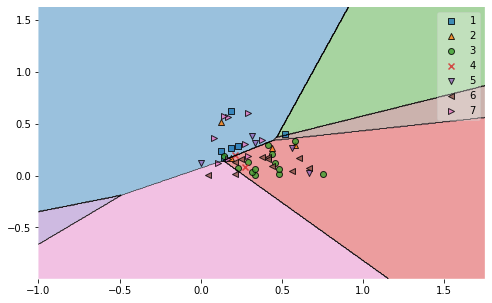

In [86]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train_sc[100:150,[2,5]]
y_b = y_train[100:150].values
log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",n_jobs=-1,random_state=42,penalty='l2',C=30)
log_reg.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = log_reg)

# Support Vector Machines

## 1. Linear SVC 

Interesting point to note is that the Linear SVC supports only the OVR(One Vs Rest) but the SVC with linear kernal supports OVO(One Vs One) and OVR as well, thus will be modelling both 

#### Hyperparameter Selection using GridSearchCV

In [99]:
from sklearn.svm import LinearSVC
param={'C':[10,20,25,30,35,40,45,50], 'penalty':['l2','l1']}
linsvc = LinearSVC(random_state=42,dual=False)  # default multi_class is ovr
linsvc_gcv=GridSearchCV(estimator=linsvc,param_grid=param,return_train_score=True,cv=5,n_jobs=-1)
linsvc_gcv.fit(x_train_sc,y_train)
print("\nBest parameters: {}".format(linsvc_gcv.best_params_))
print("\nBest cross-validation score: {:.2f}\n\n".format(linsvc_gcv.best_score_))
results = pd.DataFrame(linsvc_gcv.cv_results_)
print('GridSearchCV Results table below:\n')
display(results.head(30))


Best parameters: {'C': 25, 'penalty': 'l2'}

Best cross-validation score: 0.65


GridSearchCV Results table below:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.354094,0.514454,0.024005,0.008418,10,l2,"{'C': 10, 'penalty': 'l2'}",0.639336,0.647944,0.642959,...,0.646745,0.006172,8,0.649309,0.647571,0.650685,0.649609,0.646893,0.648813,0.001386
1,95.730564,1.898071,0.015804,0.004265,10,l1,"{'C': 10, 'penalty': 'l1'}",0.638389,0.645456,0.641773,...,0.645299,0.006286,13,0.647828,0.646534,0.649796,0.649076,0.645649,0.647776,0.001539
2,10.925660,0.300751,0.018461,0.003366,20,l2,"{'C': 20, 'penalty': 'l2'}",0.639455,0.648181,0.642959,...,0.646816,0.006108,5,0.649398,0.647453,0.650833,0.649757,0.646982,0.648885,0.001448
3,89.747628,2.163567,0.014680,0.005270,20,l1,"{'C': 20, 'penalty': 'l1'}",0.638033,0.645219,0.641892,...,0.645228,0.006348,15,0.648065,0.646149,0.649855,0.648453,0.645678,0.647640,0.001537
4,10.515465,0.280948,0.019787,0.009022,25,l2,"{'C': 25, 'penalty': 'l2'}",0.639573,0.648181,0.642959,...,0.646840,0.006080,1,0.649398,0.647453,0.650922,0.649638,0.647071,0.648896,0.001437
5,87.833037,1.129376,0.014582,0.004149,25,l1,"{'C': 25, 'penalty': 'l1'}",0.638626,0.645930,0.642010,...,0.645441,0.006027,10,0.648154,0.646327,0.649707,0.648987,0.645382,0.647711,0.001621
6,9.979256,0.281791,0.018212,0.010812,30,l2,"{'C': 30, 'penalty': 'l2'}",0.639455,0.648181,0.642959,...,0.646816,0.006108,5,0.649369,0.647482,0.650922,0.649668,0.647101,0.648908,0.001424
7,116.073171,7.111472,0.020408,0.006283,30,l1,"{'C': 30, 'penalty': 'l1'}",0.638389,0.645337,0.641892,...,0.645323,0.005940,12,0.648065,0.646416,0.649647,0.648927,0.645115,0.647634,0.001658
8,14.673009,0.741653,0.016205,0.003062,35,l2,"{'C': 35, 'penalty': 'l2'}",0.639455,0.648181,0.642959,...,0.646816,0.006108,5,0.649398,0.647453,0.650892,0.649609,0.647071,0.648885,0.001425
9,123.733674,7.031268,0.014627,0.002967,35,l1,"{'C': 35, 'penalty': 'l1'}",0.638744,0.645930,0.641892,...,0.645560,0.006088,9,0.648005,0.646534,0.649884,0.648809,0.645412,0.647729,0.001593


Thus by seeing the above results we can conclude that the best parameters are C = 25, penalty = l2 for the Linear SVC which yields the max accuracy of 0.65

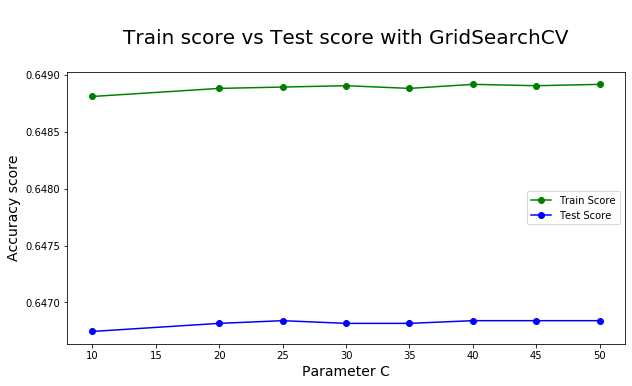

In [103]:
plt.figure(figsize=(10,5))
x_axis = results.param_C[results.param_penalty=='l2']
plt.plot(x_axis, results.mean_train_score[results.param_penalty=='l2'] , c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, results.mean_test_score[results.param_penalty=='l2'], c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('\nTrain score vs Test score with GridSearchCV\n',fontsize=20)
plt.xlabel('Parameter C',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

### Train the model with the best estimator

In [104]:
linsvc = LinearSVC(random_state=42,dual=False,C=25,penalty='l2')
scores = cross_val_score(linsvc, x_train_sc, y_train, cv=5)
print('\nFor C =',25)
print('\nThe cross validation scores for 5 folds is: ',scores)
print('\nCross validation Test score mean:',scores.mean())
linsvc.fit(x_train_sc,y_train)
y_pred=linsvc.predict(x_test_sc)
print('Training score without CV       :',linsvc.score(x_train_sc,y_train).round(5))
print('Test score without CV           :',linsvc.score(x_test_sc,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For C = 25

The cross validation scores for 5 folds is:  [0.63957346 0.64818106 0.64295875 0.64595684 0.65753587]

Cross validation Test score mean: 0.6468411968768251
Training score without CV       : 0.64852
Test score without CV           : 0.65474

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2243,317,6,0,157,60,353
2,860,1075,65,0,474,129,13
3,0,5,2281,124,112,882,0
4,0,0,206,399,0,114,0
5,80,308,241,0,1630,91,0
6,2,114,838,42,266,1758,0
7,367,0,9,0,7,0,2451



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.63      0.72      0.67      3136
           2       0.59      0.41      0.48      2616
           3       0.63      0.67      0.65      3404
           4       0.71      0.55      0.62       719
           5       0.62      0.69      0.65      2350
           6       0.58      0.58      0.58      3020
           7       0.87      0.86      0.87      2834

    accuracy                           0.65     18079
   macro avg       0.66      0.64      0.65     18079
weighted avg       0.65      0.65      0.65     18079

   micro avg	   0.65      0.65      0.65
--------------------------------------------------------------------------


#### Plotting the decision region

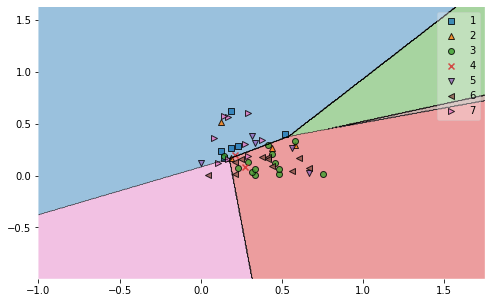

In [105]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train_sc[100:150,[2,5]]
y_b = y_train[100:150].values
linsvc = LinearSVC(random_state=42,dual=False,C=25,penalty='l2')
linsvc.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = linsvc)

## 2. SVC with Linear Kernal

#### Hyperparameter Selection using GridSearchCV

In [108]:
from sklearn.svm import SVC
param={'C':[0.1,1,10,15,20,25,30], 'decision_function_shape':['ovr','ovo']} #USING BOTH OVR AND OVO METHODS
svclinkl = SVC(kernel='linear', random_state=42)
svclinkl_gcv=GridSearchCV(estimator=svclinkl,param_grid=param,return_train_score=True,cv=5,n_jobs=-1)
svclinkl_gcv.fit(x_train_sc,y_train)
print("\nBest parameters: {}".format(svclinkl_gcv.best_params_))
print("\nBest cross-validation score: {:.2f}\n\n".format(svclinkl_gcv.best_score_))
results = pd.DataFrame(svclinkl_gcv.cv_results_)
print('GridSearchCV Results table below:\n')
display(results.head(30))


Best parameters: {'C': 30, 'decision_function_shape': 'ovr'}

Best cross-validation score: 0.69


GridSearchCV Results table below:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,303.922334,2.493274,70.976647,0.472040,0.1,ovr,"{'C': 0.1, 'decision_function_shape': 'ovr'}",0.633294,0.642375,0.645922,...,0.642146,0.006123,13,0.644805,0.643007,0.643365,0.644897,0.641619,0.643539,0.001220
1,318.657955,22.267767,74.513085,5.928695,0.1,ovo,"{'C': 0.1, 'decision_function_shape': 'ovo'}",0.633294,0.642375,0.645922,...,0.642146,0.006123,13,0.644805,0.643007,0.643365,0.644897,0.641619,0.643539,0.001220
2,292.503996,7.142129,70.578603,4.971500,1,ovr,"{'C': 1, 'decision_function_shape': 'ovr'}",0.672512,0.686693,0.687293,...,0.681641,0.006282,11,0.679331,0.688172,0.684911,0.682796,0.684968,0.684036,0.002913
3,337.467423,29.058797,85.951934,10.075139,1,ovo,"{'C': 1, 'decision_function_shape': 'ovo'}",0.672512,0.686693,0.687293,...,0.681641,0.006282,11,0.679331,0.688172,0.684911,0.682796,0.684968,0.684036,0.002913
4,349.084518,37.662517,84.067603,9.006716,10,ovr,"{'C': 10, 'decision_function_shape': 'ovr'}",0.677133,0.694988,0.694523,...,0.690579,0.006806,9,0.686474,0.695463,0.697238,0.693908,0.696465,0.693910,0.003881
5,273.939816,1.091660,64.337540,0.574030,10,ovo,"{'C': 10, 'decision_function_shape': 'ovo'}",0.677133,0.694988,0.694523,...,0.690579,0.006806,9,0.686474,0.695463,0.697238,0.693908,0.696465,0.693910,0.003881
6,295.355705,11.196093,71.970272,8.280376,15,ovr,"{'C': 15, 'decision_function_shape': 'ovr'}",0.678318,0.697002,0.694523,...,0.691219,0.006647,7,0.686592,0.696381,0.697623,0.694560,0.696910,0.694413,0.004040
7,339.711230,18.076088,86.073974,1.402856,15,ovo,"{'C': 15, 'decision_function_shape': 'ovo'}",0.678318,0.697002,0.694523,...,0.691219,0.006647,7,0.686592,0.696381,0.697623,0.694560,0.696910,0.694413,0.004040
8,363.261391,39.703951,69.056265,5.072905,20,ovr,"{'C': 20, 'decision_function_shape': 'ovr'}",0.678673,0.697476,0.693812,...,0.691456,0.006587,3,0.686859,0.696411,0.697772,0.694737,0.697028,0.694561,0.003979
9,288.788112,2.056335,64.483510,0.501574,20,ovo,"{'C': 20, 'decision_function_shape': 'ovo'}",0.678673,0.697476,0.693812,...,0.691456,0.006587,3,0.686859,0.696411,0.697772,0.694737,0.697028,0.694561,0.003979


From the above results we can conclude that the best parameters are 'C': 30, 'decision_function_shape': 'ovr' with the accuracy score of 0.69 but even the OVO method scores the same accuracy when you see the above CV results, hence we will be using the OVO for training the model instead of OVR

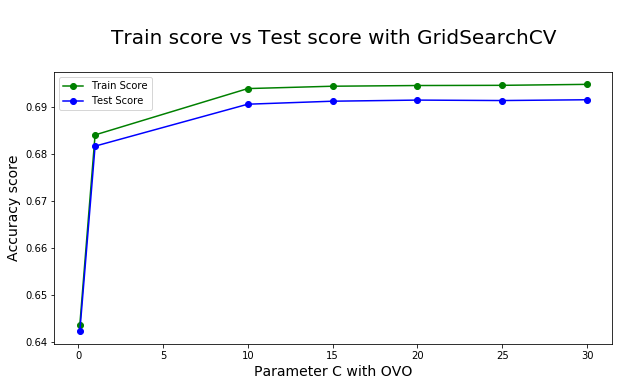

In [109]:
plt.figure(figsize=(10,5))
x_axis = results.param_C[results.param_decision_function_shape=='ovo']
plt.plot(x_axis, results.mean_train_score[results.param_decision_function_shape=='ovo'] , c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, results.mean_test_score[results.param_decision_function_shape=='ovo'], c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('\nTrain score vs Test score with GridSearchCV\n',fontsize=20)
plt.xlabel('Parameter C with OVO',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

#### Train the model with the best parameters

In [110]:
svclinkl = SVC(kernel='linear', random_state=42,C=30,decision_function_shape='ovo')
scores = cross_val_score(svclinkl, x_train_sc, y_train, cv=5)
print('\nFor C =',30)
print('\nThe cross validation scores for 5 folds is: ',scores)
print('\nCross validation Test score mean:',scores.mean())
svclinkl.fit(x_train_sc,y_train)
y_pred=svclinkl.predict(x_test_sc)
print('Training score without CV       :',svclinkl.score(x_train_sc,y_train).round(5))
print('Test score without CV           :',svclinkl.score(x_test_sc,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For C = 30

The cross validation scores for 5 folds is:  [0.6785545  0.69723901 0.69345661 0.69290965 0.69548203]

Cross validation Test score mean: 0.6915283625028413
Training score without CV       : 0.69504
Test score without CV           : 0.70004

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2165,476,12,0,90,18,375
2,693,1318,75,0,420,88,22
3,0,11,2251,120,56,966,0
4,0,0,193,437,0,89,0
5,11,281,96,0,1910,52,0
6,0,35,836,42,46,2061,0
7,313,1,5,0,1,0,2514



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.68      0.69      0.69      3136
           2       0.62      0.50      0.56      2616
           3       0.65      0.66      0.66      3404
           4       0.73      0.61      0.66       719
           5       0.76      0.81      0.78      2350
           6       0.63      0.68      0.65      3020
           7       0.86      0.89      0.88      2834

    accuracy                           0.70     18079
   macro avg       0.70      0.69      0.70     18079
weighted avg       0.70      0.70      0.70     18079

   micro avg	   0.7      0.7      0.7
--------------------------------------------------------------------------


#### Plotting the decision region

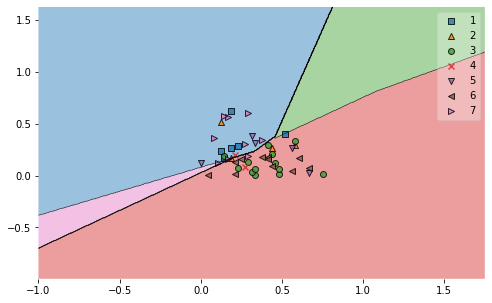

In [111]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train_sc[100:150,[2,5]]
y_b = y_train[100:150].values
svclinkl = SVC(kernel='linear', random_state=42,C=30,decision_function_shape='ovo')
svclinkl.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = svclinkl)

## 3.SVC with Radial Bias Function Kernal

#### Hyperparameter selection using CrossValidation

In [21]:
from sklearn.svm import SVC

In [ ]:
train_cv_array=[]
train_score_array = []
test_score_array = []
for i in [0.1,1,10,15,20,25]:
    for ga in  [0.001,0.1,1,10]:
        svcrbf = SVC(kernel='rbf', random_state=42,C=i, gamma=ga)
        scores = cross_val_score(svcrbf, x_train_sc, y_train, cv=5)
        print('\nFor C =',i,'and gamma = ',ga)
        print('\nCross validation Training score mean:',scores.mean())
        svcrbf.fit(x_train_sc,y_train)
        y_pred=svcrbf.predict(x_test_sc)
        train_score_array.append(svcrbf.score(x_train_sc,y_train).round(5))
        test_score_array.append(svcrbf.score(x_test_sc,y_test).round(5))
        train_cv_array.append(scores.mean())
        print('Training score without CV:',svcrbf.score(x_train_sc,y_train).round(5))
        print('Test score -->',svcrbf.score(x_test_sc,y_test).round(5))
        print('\nThe Confusion Matrix is plotted below:')
        display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
        print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
        print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
              f1_score(y_test, y_pred, average='micro').round(2) )
        print('--------------------------------------------------------------------------')
    


For C = 0.1 and gamma =  0.001

Cross validation Training score mean: 0.3525199735665372
Training score without CV: 0.3456
Test score --> 0.34393

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,3110,0,21,0,0,0,5
2,2469,0,147,0,0,0,0
3,373,0,3031,0,0,0,0
4,0,0,719,0,0,0,0
5,2120,0,230,0,0,0,0
6,583,0,2437,0,0,0,0
7,2757,0,0,0,0,0,77


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.27      0.99      0.43      3136
           2       0.00      0.00      0.00      2616
           3       0.46      0.89      0.61      3404
           4       0.00      0.00      0.00       719
           5       0.00      0.00      0.00      2350
           6       0.00      0.00      0.00      3020
           7       0.94      0.03      0.05      2834

    accuracy                           0.34     18079
   macro avg       0.24      0.27      0.16     18079
weighted avg       0.28      0.34      0.20     18079

   micro avg	   0.34      0.34      0.34
--------------------------------------------------------------------------

For C = 0.1 and gamma =  0.1

Cross validation Training score mean: 0.599474234962737
Training score without CV: 0.61194
Test score --> 0.61928

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2066,598,4,0,103,44,321
2,970,1137,49,0,330,120,10
3,0,6,2126,158,124,990,0
4,0,0,214,421,0,84,0
5,393,276,209,0,1410,62,0
6,37,141,822,46,228,1746,0
7,498,20,9,0,17,0,2290



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.52      0.66      0.58      3136
           2       0.52      0.43      0.47      2616
           3       0.62      0.62      0.62      3404
           4       0.67      0.59      0.63       719
           5       0.64      0.60      0.62      2350
           6       0.57      0.58      0.58      3020
           7       0.87      0.81      0.84      2834

    accuracy                           0.62     18079
   macro avg       0.63      0.61      0.62     18079
weighted avg       0.62      0.62      0.62     18079

   micro avg	   0.62      0.62      0.62
--------------------------------------------------------------------------

For C = 0.1 and gamma =  1

Cross validation Training score mean: 0.6717087600038368
Training score without CV: 0.68503
Test score --> 0.69274

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2199,500,4,0,105,67,261
2,732,1376,51,0,306,137,14
3,0,6,2482,155,109,652,0
4,0,0,212,411,0,96,0
5,112,346,86,0,1717,89,0
6,29,67,880,32,101,1911,0
7,369,11,7,0,19,0,2428



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.64      0.70      0.67      3136
           2       0.60      0.53      0.56      2616
           3       0.67      0.73      0.70      3404
           4       0.69      0.57      0.62       719
           5       0.73      0.73      0.73      2350
           6       0.65      0.63      0.64      3020
           7       0.90      0.86      0.88      2834

    accuracy                           0.69     18079
   macro avg       0.69      0.68      0.69     18079
weighted avg       0.69      0.69      0.69     18079

   micro avg	   0.69      0.69      0.69
--------------------------------------------------------------------------

For C = 0.1 and gamma =  10

Cross validation Training score mean: 0.7387981491579717
Training score without CV: 0.76943
Test score --> 0.76133

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2523,347,6,0,46,22,192
2,846,1375,68,0,209,100,18
3,9,9,2662,103,41,580,0
4,9,0,162,455,0,93,0
5,141,161,72,0,1903,73,0
6,31,43,617,20,19,2290,0
7,274,2,0,0,2,0,2556



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.66      0.80      0.72      3136
           2       0.71      0.53      0.60      2616
           3       0.74      0.78      0.76      3404
           4       0.79      0.63      0.70       719
           5       0.86      0.81      0.83      2350
           6       0.73      0.76      0.74      3020
           7       0.92      0.90      0.91      2834

    accuracy                           0.76     18079
   macro avg       0.77      0.74      0.75     18079
weighted avg       0.77      0.76      0.76     18079

   micro avg	   0.76      0.76      0.76
--------------------------------------------------------------------------

For C = 1 and gamma =  0.001

Cross validation Training score mean: 0.5447355230098677
Training score without CV: 0.55097
Test score --> 0.55871

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2576,37,4,0,181,17,321
2,1740,298,46,0,413,109,10
3,6,0,2158,0,140,1100,0
4,0,0,601,0,0,118,0
5,789,56,209,0,1246,50,0
6,172,0,911,0,362,1575,0
7,544,0,9,0,33,0,2248


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.44      0.82      0.57      3136
           2       0.76      0.11      0.20      2616
           3       0.55      0.63      0.59      3404
           4       0.00      0.00      0.00       719
           5       0.52      0.53      0.53      2350
           6       0.53      0.52      0.53      3020
           7       0.87      0.79      0.83      2834

    accuracy                           0.56     18079
   macro avg       0.53      0.49      0.46     18079
weighted avg       0.58      0.56      0.53     18079

   micro avg	   0.56      0.56      0.56
--------------------------------------------------------------------------

For C = 1 and gamma =  0.1

Cross validation Training score mean: 0.6851037410300667
Training score without CV: 0.69662
Test score --> 0.7043

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2252,423,15,0,90,41,315
2,695,1377,69,0,357,106,12
3,0,7,2484,158,87,668,0
4,0,0,209,421,0,89,0
5,39,327,91,0,1816,77,0
6,0,82,900,46,52,1940,0
7,380,0,8,0,3,0,2443



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.67      0.72      0.69      3136
           2       0.62      0.53      0.57      2616
           3       0.66      0.73      0.69      3404
           4       0.67      0.59      0.63       719
           5       0.76      0.77      0.76      2350
           6       0.66      0.64      0.65      3020
           7       0.88      0.86      0.87      2834

    accuracy                           0.70     18079
   macro avg       0.70      0.69      0.70     18079
weighted avg       0.70      0.70      0.70     18079

   micro avg	   0.7      0.7      0.7
--------------------------------------------------------------------------

For C = 1 and gamma =  1

Cross validation Training score mean: 0.7592824194794806
Training score without CV: 0.77749
Test score --> 0.7736

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2357,438,14,0,81,11,235
2,601,1530,67,0,296,101,21
3,0,2,2623,131,40,608,0
4,0,0,141,505,0,73,0
5,15,191,71,0,2033,40,0
6,0,32,635,38,20,2295,0
7,188,0,1,0,2,0,2643



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.75      0.75      0.75      3136
           2       0.70      0.58      0.64      2616
           3       0.74      0.77      0.75      3404
           4       0.75      0.70      0.73       719
           5       0.82      0.87      0.84      2350
           6       0.73      0.76      0.75      3020
           7       0.91      0.93      0.92      2834

    accuracy                           0.77     18079
   macro avg       0.77      0.77      0.77     18079
weighted avg       0.77      0.77      0.77     18079

   micro avg	   0.77      0.77      0.77
--------------------------------------------------------------------------

For C = 1 and gamma =  10

Cross validation Training score mean: 0.8314212389946327
Training score without CV: 0.87533
Test score --> 0.84219

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2489,436,2,0,45,5,159
2,473,1799,56,0,202,70,16
3,1,9,2834,60,20,480,0
4,0,0,90,577,0,52,0
5,10,80,55,0,2187,18,0
6,4,14,344,34,19,2605,0
7,94,4,0,0,1,0,2735



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.81      0.79      0.80      3136
           2       0.77      0.69      0.73      2616
           3       0.84      0.83      0.84      3404
           4       0.86      0.80      0.83       719
           5       0.88      0.93      0.91      2350
           6       0.81      0.86      0.83      3020
           7       0.94      0.97      0.95      2834

    accuracy                           0.84     18079
   macro avg       0.84      0.84      0.84     18079
weighted avg       0.84      0.84      0.84     18079

   micro avg	   0.84      0.84      0.84
--------------------------------------------------------------------------

For C = 10 and gamma =  0.001

Cross validation Training score mean: 0.5962976320608186
Training score without CV: 0.60339
Test score --> 0.61325

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2259,406,4,0,102,44,321
2,1038,1053,50,0,346,119,10
3,0,6,1913,158,124,1203,0
4,0,0,214,421,0,84,0
5,363,366,209,0,1351,61,0
6,26,143,760,46,240,1805,0
7,536,0,9,0,4,0,2285



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.54      0.72      0.61      3136
           2       0.53      0.40      0.46      2616
           3       0.61      0.56      0.58      3404
           4       0.67      0.59      0.63       719
           5       0.62      0.57      0.60      2350
           6       0.54      0.60      0.57      3020
           7       0.87      0.81      0.84      2834

    accuracy                           0.61     18079
   macro avg       0.63      0.61      0.61     18079
weighted avg       0.62      0.61      0.61     18079

   micro avg	   0.61      0.61      0.61
--------------------------------------------------------------------------

For C = 10 and gamma =  0.1

Cross validation Training score mean: 0.7435163150973464
Training score without CV: 0.75411
Test score --> 0.75944

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2315,447,15,0,87,13,259
2,616,1473,75,0,338,89,25
3,0,7,2619,127,34,617,0
4,0,0,146,498,0,75,0
5,8,205,82,0,2013,42,0
6,1,32,738,35,19,2195,0
7,214,0,1,0,2,0,2617



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.73      0.74      0.74      3136
           2       0.68      0.56      0.62      2616
           3       0.71      0.77      0.74      3404
           4       0.75      0.69      0.72       719
           5       0.81      0.86      0.83      2350
           6       0.72      0.73      0.73      3020
           7       0.90      0.92      0.91      2834

    accuracy                           0.76     18079
   macro avg       0.76      0.75      0.75     18079
weighted avg       0.76      0.76      0.76     18079

   micro avg	   0.76      0.76      0.76
--------------------------------------------------------------------------

For C = 10 and gamma =  1

Cross validation Training score mean: 0.8097063766796035
Training score without CV: 0.83308
Test score --> 0.81592

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2399,447,4,0,72,6,208
2,502,1698,50,0,267,77,22
3,0,13,2676,103,26,586,0
4,0,0,89,584,0,46,0
5,7,99,61,0,2165,18,0
6,1,22,450,36,13,2498,0
7,100,1,0,0,2,0,2731



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.80      0.76      0.78      3136
           2       0.74      0.65      0.69      2616
           3       0.80      0.79      0.79      3404
           4       0.81      0.81      0.81       719
           5       0.85      0.92      0.88      2350
           6       0.77      0.83      0.80      3020
           7       0.92      0.96      0.94      2834

    accuracy                           0.82     18079
   macro avg       0.81      0.82      0.82     18079
weighted avg       0.81      0.82      0.81     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For C = 10 and gamma =  10

Cross validation Training score mean: 0.8691861726719873
Training score without CV: 0.94142
Test score --> 0.87781

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2601,393,1,0,25,6,110
2,434,1919,39,0,157,52,15
3,1,18,2955,57,18,355,0
4,0,0,61,628,0,30,0
5,11,46,25,0,2254,14,0
6,4,9,229,29,10,2739,0
7,57,1,0,0,2,0,2774



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.84      0.83      0.83      3136
           2       0.80      0.73      0.77      2616
           3       0.89      0.87      0.88      3404
           4       0.88      0.87      0.88       719
           5       0.91      0.96      0.94      2350
           6       0.86      0.91      0.88      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.88     18079
   macro avg       0.88      0.88      0.88     18079
weighted avg       0.88      0.88      0.88     18079

   micro avg	   0.88      0.88      0.88
--------------------------------------------------------------------------

For C = 15 and gamma =  0.001

Cross validation Training score mean: 0.6102849316009997
Training score without CV: 0.62071
Test score --> 0.63156

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2374,294,4,0,102,41,321
2,998,1082,49,0,359,118,10
3,0,6,1916,158,122,1202,0
4,0,0,214,421,0,84,0
5,146,455,211,0,1478,60,0
6,12,138,760,46,210,1854,0
7,530,0,9,0,2,0,2293



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.58      0.76      0.66      3136
           2       0.55      0.41      0.47      2616
           3       0.61      0.56      0.58      3404
           4       0.67      0.59      0.63       719
           5       0.65      0.63      0.64      2350
           6       0.55      0.61      0.58      3020
           7       0.87      0.81      0.84      2834

    accuracy                           0.63     18079
   macro avg       0.64      0.62      0.63     18079
weighted avg       0.64      0.63      0.63     18079

   micro avg	   0.63      0.63      0.63
--------------------------------------------------------------------------

For C = 15 and gamma =  0.1

Cross validation Training score mean: 0.7516245195447155
Training score without CV: 0.76239
Test score --> 0.76426

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2307,446,14,0,86,12,271
2,611,1490,68,0,328,92,27
3,0,8,2613,127,31,625,0
4,0,0,142,506,0,71,0
5,6,206,71,0,2029,38,0
6,1,29,729,35,20,2206,0
7,165,0,1,0,2,0,2666



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.75      0.74      0.74      3136
           2       0.68      0.57      0.62      2616
           3       0.72      0.77      0.74      3404
           4       0.76      0.70      0.73       719
           5       0.81      0.86      0.84      2350
           6       0.72      0.73      0.73      3020
           7       0.90      0.94      0.92      2834

    accuracy                           0.76     18079
   macro avg       0.76      0.76      0.76     18079
weighted avg       0.76      0.76      0.76     18079

   micro avg	   0.76      0.76      0.76
--------------------------------------------------------------------------

For C = 15 and gamma =  1

Cross validation Training score mean: 0.8158936916001593
Training score without CV: 0.84138
Test score --> 0.82328

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2425,444,3,0,66,6,192
2,501,1718,51,0,251,74,21
3,0,16,2699,92,23,574,0
4,0,0,89,592,0,38,0
5,6,80,60,0,2185,19,0
6,1,15,425,35,14,2530,0
7,96,1,0,0,2,0,2735



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.80      0.77      0.79      3136
           2       0.76      0.66      0.70      2616
           3       0.81      0.79      0.80      3404
           4       0.82      0.82      0.82       719
           5       0.86      0.93      0.89      2350
           6       0.78      0.84      0.81      3020
           7       0.93      0.97      0.95      2834

    accuracy                           0.82     18079
   macro avg       0.82      0.83      0.82     18079
weighted avg       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For C = 15 and gamma =  10

Cross validation Training score mean: 0.8695178783946325
Training score without CV: 0.94913
Test score --> 0.87958

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2605,389,0,0,23,7,112
2,442,1931,35,0,149,46,13
3,1,21,2963,57,16,346,0
4,0,0,59,630,0,30,0
5,13,45,23,0,2256,13,0
6,4,14,216,27,10,2749,0
7,63,1,0,0,2,0,2768



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.83      0.83      0.83      3136
           2       0.80      0.74      0.77      2616
           3       0.90      0.87      0.88      3404
           4       0.88      0.88      0.88       719
           5       0.92      0.96      0.94      2350
           6       0.86      0.91      0.89      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.88     18079
   macro avg       0.88      0.88      0.88     18079
weighted avg       0.88      0.88      0.88     18079

   micro avg	   0.88      0.88      0.88
--------------------------------------------------------------------------

For C = 20 and gamma =  0.001

Cross validation Training score mean: 0.6229207700501588


In [24]:
train_cv_array=[]
train_score_array = []
test_score_array = []
for i in [20,25]:
    for ga in  [0.001,0.1,1,10]:
        svcrbf = SVC(kernel='rbf', random_state=42,C=i, gamma=ga)
        scores = cross_val_score(svcrbf, x_train_sc, y_train, cv=5)
        print('\nFor C =',i,'and gamma = ',ga)
        print('\nCross validation Training score mean:',scores.mean())
        svcrbf.fit(x_train_sc,y_train)
        y_pred=svcrbf.predict(x_test_sc)
        train_score_array.append(svcrbf.score(x_train_sc,y_train).round(5))
        test_score_array.append(svcrbf.score(x_test_sc,y_test).round(5))
        train_cv_array.append(scores.mean())
        print('Training score without CV:',svcrbf.score(x_train_sc,y_train).round(5))
        print('Test score -->',svcrbf.score(x_test_sc,y_test).round(5))
        print('\nThe Confusion Matrix is plotted below:')
        display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
        print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
        print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
              f1_score(y_test, y_pred, average='micro').round(2) )
        print('--------------------------------------------------------------------------')
    


For C = 20 and gamma =  0.001

Cross validation Training score mean: 0.6229207700501588
Training score without CV: 0.63262
Test score --> 0.64257

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2357,308,4,0,110,36,321
2,910,1159,51,0,369,116,11
3,0,10,1918,158,121,1197,0
4,0,0,214,421,0,84,0
5,93,434,214,0,1546,63,0
6,0,119,760,46,172,1923,0
7,530,0,9,0,2,0,2293



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.61      0.75      0.67      3136
           2       0.57      0.44      0.50      2616
           3       0.61      0.56      0.58      3404
           4       0.67      0.59      0.63       719
           5       0.67      0.66      0.66      2350
           6       0.56      0.64      0.60      3020
           7       0.87      0.81      0.84      2834

    accuracy                           0.64     18079
   macro avg       0.65      0.64      0.64     18079
weighted avg       0.65      0.64      0.64     18079

   micro avg	   0.64      0.64      0.64
--------------------------------------------------------------------------

For C = 20 and gamma =  0.1

Cross validation Training score mean: 0.7559394228852826
Training score without CV: 0.76703
Test score --> 0.76829

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2317,441,14,0,84,12,268
2,604,1501,66,0,330,89,26
3,0,10,2613,122,29,630,0
4,0,0,139,515,0,65,0
5,6,203,71,0,2032,38,0
6,1,27,699,37,22,2234,0
7,153,0,1,0,2,0,2678



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.75      0.74      0.75      3136
           2       0.69      0.57      0.63      2616
           3       0.73      0.77      0.75      3404
           4       0.76      0.72      0.74       719
           5       0.81      0.86      0.84      2350
           6       0.73      0.74      0.73      3020
           7       0.90      0.94      0.92      2834

    accuracy                           0.77     18079
   macro avg       0.77      0.76      0.76     18079
weighted avg       0.77      0.77      0.77     18079

   micro avg	   0.77      0.77      0.77
--------------------------------------------------------------------------

For C = 20 and gamma =  1

Cross validation Training score mean: 0.821251406342834
Training score without CV: 0.8484
Test score --> 0.8287

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2426,450,4,0,65,5,186
2,489,1735,50,0,247,73,22
3,0,17,2743,67,23,554,0
4,0,0,87,595,0,37,0
5,5,75,59,0,2194,17,0
6,1,17,404,36,15,2547,0
7,89,1,0,0,2,0,2742



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.81      0.77      0.79      3136
           2       0.76      0.66      0.71      2616
           3       0.82      0.81      0.81      3404
           4       0.85      0.83      0.84       719
           5       0.86      0.93      0.90      2350
           6       0.79      0.84      0.81      3020
           7       0.93      0.97      0.95      2834

    accuracy                           0.83     18079
   macro avg       0.83      0.83      0.83     18079
weighted avg       0.83      0.83      0.83     18079

   micro avg	   0.83      0.83      0.83
--------------------------------------------------------------------------

For C = 20 and gamma =  10

Cross validation Training score mean: 0.8696839461795534
Training score without CV: 0.95564
Test score --> 0.87981

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2596,404,0,0,21,7,108
2,439,1942,33,0,147,41,14
3,1,23,2973,55,15,337,0
4,0,0,60,629,0,30,0
5,15,47,20,0,2256,12,0
6,4,14,223,24,9,2746,0
7,67,1,0,0,2,0,2764



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.83      0.83      0.83      3136
           2       0.80      0.74      0.77      2616
           3       0.90      0.87      0.89      3404
           4       0.89      0.87      0.88       719
           5       0.92      0.96      0.94      2350
           6       0.87      0.91      0.89      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.88     18079
   macro avg       0.88      0.88      0.88     18079
weighted avg       0.88      0.88      0.88     18079

   micro avg	   0.88      0.88      0.88
--------------------------------------------------------------------------

For C = 25 and gamma =  0.001

Cross validation Training score mean: 0.6303646132561451
Training score without CV: 0.63605
Test score --> 0.64854

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2333,332,4,0,114,32,321
2,852,1210,52,0,374,117,11
3,0,14,1917,158,120,1195,0
4,0,0,214,421,0,84,0
5,72,419,212,0,1578,69,0
6,0,104,761,46,145,1964,0
7,521,1,9,0,1,0,2302



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.62      0.74      0.67      3136
           2       0.58      0.46      0.52      2616
           3       0.60      0.56      0.58      3404
           4       0.67      0.59      0.63       719
           5       0.68      0.67      0.67      2350
           6       0.57      0.65      0.61      3020
           7       0.87      0.81      0.84      2834

    accuracy                           0.65     18079
   macro avg       0.66      0.64      0.65     18079
weighted avg       0.65      0.65      0.65     18079

   micro avg	   0.65      0.65      0.65
--------------------------------------------------------------------------

For C = 25 and gamma =  0.1

Cross validation Training score mean: 0.7598511089846441
Training score without CV: 0.77035
Test score --> 0.77117

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2329,433,14,0,83,12,265
2,607,1509,65,0,321,88,26
3,0,10,2612,124,29,629,0
4,0,0,143,521,0,55,0
5,5,202,71,0,2036,36,0
6,1,26,684,38,22,2249,0
7,145,0,1,0,2,0,2686



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.75      0.74      0.75      3136
           2       0.69      0.58      0.63      2616
           3       0.73      0.77      0.75      3404
           4       0.76      0.72      0.74       719
           5       0.82      0.87      0.84      2350
           6       0.73      0.74      0.74      3020
           7       0.90      0.95      0.92      2834

    accuracy                           0.77     18079
   macro avg       0.77      0.77      0.77     18079
weighted avg       0.77      0.77      0.77     18079

   micro avg	   0.77      0.77      0.77
--------------------------------------------------------------------------

For C = 25 and gamma =  1

Cross validation Training score mean: 0.825115645719352
Training score without CV: 0.85247
Test score --> 0.83218

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2434,452,4,0,61,5,180
2,480,1756,45,0,242,72,21
3,0,17,2755,67,22,543,0
4,0,0,85,597,0,37,0
5,5,74,59,0,2195,17,0
6,1,18,390,36,14,2561,0
7,84,1,0,0,2,0,2747



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.81      0.78      0.79      3136
           2       0.76      0.67      0.71      2616
           3       0.83      0.81      0.82      3404
           4       0.85      0.83      0.84       719
           5       0.87      0.93      0.90      2350
           6       0.79      0.85      0.82      3020
           7       0.93      0.97      0.95      2834

    accuracy                           0.83     18079
   macro avg       0.83      0.83      0.83     18079
weighted avg       0.83      0.83      0.83     18079

   micro avg	   0.83      0.83      0.83
--------------------------------------------------------------------------

For C = 25 and gamma =  10

Cross validation Training score mean: 0.8703238212119878
Training score without CV: 0.96036
Test score --> 0.87969

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2593,410,0,0,21,6,106
2,442,1938,33,0,148,42,13
3,1,23,2975,52,17,336,0
4,0,0,59,630,0,30,0
5,14,47,20,0,2257,12,0
6,4,13,222,24,9,2748,0
7,67,2,0,0,2,0,2763



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.83      0.83      0.83      3136
           2       0.80      0.74      0.77      2616
           3       0.90      0.87      0.89      3404
           4       0.89      0.88      0.88       719
           5       0.92      0.96      0.94      2350
           6       0.87      0.91      0.89      3020
           7       0.96      0.97      0.97      2834

    accuracy                           0.88     18079
   macro avg       0.88      0.88      0.88     18079
weighted avg       0.88      0.88      0.88     18079

   micro avg	   0.88      0.88      0.88
--------------------------------------------------------------------------


From the above table we can find that the best parameters are C=15 and gamma = 10 which yields an accuracy anf recall score of about 0.87958 

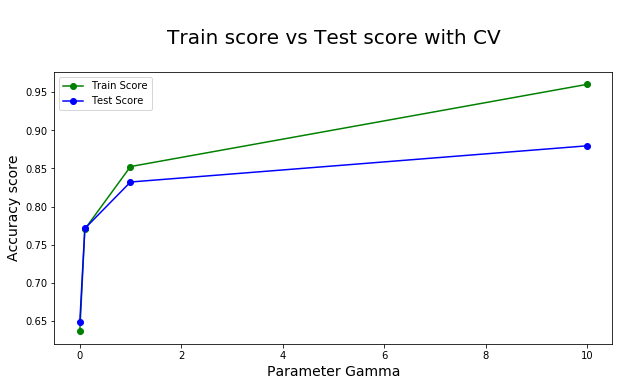

In [33]:
plt.figure(figsize=(10,5))
x_axis = [0.001,0.1,1,10]
plt.plot(x_axis, train_score_array[4:] , c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis,test_score_array[4:], c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('\nTrain score vs Test score with CV\n',fontsize=20)
plt.xlabel('Parameter Gamma',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

#### Tranining with the best parameters

In [34]:
train_cv_array=[]
train_score_array = []
test_score_array = []
svcrbf = SVC(kernel='rbf', random_state=42,C=15, gamma=10)
scores = cross_val_score(svcrbf, x_train_sc, y_train, cv=5)
print('\nFor C =',15,'and gamma = ',10)
print('Cross validation score for 5 split is: ',scores)
print('\nCross validation Testing score mean:',scores.mean())
svcrbf.fit(x_train_sc,y_train)
y_pred=svcrbf.predict(x_test_sc)
train_score_array.append(svcrbf.score(x_train_sc,y_train).round(5))
test_score_array.append(svcrbf.score(x_test_sc,y_test).round(5))
train_cv_array.append(scores.mean())
print('Training score without CV:',svcrbf.score(x_train_sc,y_train).round(5))
print('Test score -->',svcrbf.score(x_test_sc,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For C = 15 and gamma =  10
Cross validation score for 5 split is:  [0.86646919 0.87368172 0.8667615  0.87099834 0.86967864]

Cross validation Testing score mean: 0.8695178783946325
Training score without CV: 0.94913
Test score --> 0.87958

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2605,389,0,0,23,7,112
2,442,1931,35,0,149,46,13
3,1,21,2963,57,16,346,0
4,0,0,59,630,0,30,0
5,13,45,23,0,2256,13,0
6,4,14,216,27,10,2749,0
7,63,1,0,0,2,0,2768



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.83      0.83      0.83      3136
           2       0.80      0.74      0.77      2616
           3       0.90      0.87      0.88      3404
           4       0.88      0.88      0.88       719
           5       0.92      0.96      0.94      2350
           6       0.86      0.91      0.89      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.88     18079
   macro avg       0.88      0.88      0.88     18079
weighted avg       0.88      0.88      0.88     18079

   micro avg	   0.88      0.88      0.88
--------------------------------------------------------------------------


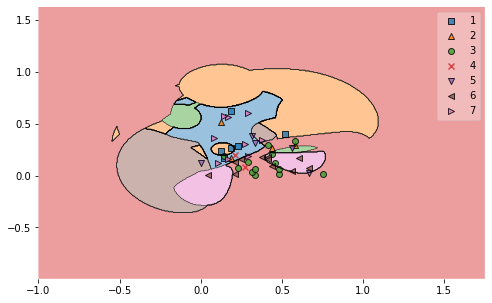

In [35]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train_sc[100:150,[2,5]]
y_b = y_train[100:150].values
svcrbf = SVC(kernel='rbf', random_state=42,C=15, gamma=10)
svcrbf.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = svcrbf)

# Decision Trees

As the Decision tree doesn't require its data to be scaled we will be using the train and test split before the scaling, and moreover we will be using only Cross validation instead of GridsearchCV as wee need to keep an eye on the Recall score in teh classification report

Here we will be using Cross validation only instead of Gridsearch

In [22]:
train_cv_array=[]
train_score_array = []
test_score_array = []

from sklearn.tree import DecisionTreeClassifier
for d in [3,5,8,10,12,15,18,20,22,24,26,28,30,50,100]:
    dtree = DecisionTreeClassifier(max_depth=d,random_state=999)
    scores = cross_val_score(dtree, x_train, y_train, cv=5)
    print('\nFor maxdepth =',d)
    print('\nCross validation Test mean:',scores.mean())
    dtree.fit(x_train,y_train)
    y_pred=dtree.predict(x_test)
    train_score_array.append(dtree.score(x_train, y_train))
    test_score_array.append(dtree.score(x_test, y_test))
    train_cv_array.append(scores.mean())
    print('Training score without CV:',dtree.score(x_train, y_train))
    print('Test score -->',dtree.score(x_test, y_test))
    print('\nThe Confusion Matrix is plotted below:')
    display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
    print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
    print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
          f1_score(y_test, y_pred, average='micro').round(2) )
    print('--------------------------------------------------------------------------')
    


For maxdepth = 3

Cross validation Test mean: 0.5601200501152113
Training score without CV: 0.56095016831824
Test score --> 0.5577742131755075

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1904,4,2,0,351,29,846
2,1107,123,5,0,1093,150,138
3,0,0,662,0,168,2574,0
4,0,0,42,0,0,677,0
5,65,67,8,0,2042,168,0
6,0,0,98,0,207,2715,0
7,186,0,0,0,10,0,2638


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.58      0.61      0.60      3136
           2       0.63      0.05      0.09      2616
           3       0.81      0.19      0.31      3404
           4       0.00      0.00      0.00       719
           5       0.53      0.87      0.66      2350
           6       0.43      0.90      0.58      3020
           7       0.73      0.93      0.82      2834

    accuracy                           0.56     18079
   macro avg       0.53      0.51      0.44     18079
weighted avg       0.60      0.56      0.49     18079

   micro avg	   0.56      0.56      0.56
--------------------------------------------------------------------------

For maxdepth = 5

Cross validation Test mean: 0.6208096131009267
Training score without CV: 0.6233701578872505
Test score --> 0.6230433099175839

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2042,441,1,2,237,28,385
2,721,955,14,4,768,137,17
3,0,0,803,145,168,2288,0
4,0,0,33,518,0,168,0
5,19,101,6,17,2054,153,0
6,0,9,101,220,198,2492,0
7,423,1,0,0,10,0,2400



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.64      0.65      0.64      3136
           2       0.63      0.37      0.46      2616
           3       0.84      0.24      0.37      3404
           4       0.57      0.72      0.64       719
           5       0.60      0.87      0.71      2350
           6       0.47      0.83      0.60      3020
           7       0.86      0.85      0.85      2834

    accuracy                           0.62     18079
   macro avg       0.66      0.65      0.61     18079
weighted avg       0.67      0.62      0.60     18079

   micro avg	   0.62      0.62      0.62
--------------------------------------------------------------------------

For maxdepth = 8

Cross validation Test mean: 0.7028344696253248
Training score without CV: 0.7121758095870276
Test score --> 0.7047403064328779

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2173,511,1,0,160,29,262
2,685,1291,36,0,474,118,12
3,0,0,1913,67,117,1307,0
4,0,0,58,536,0,125,0
5,13,195,61,0,1981,100,0
6,0,5,404,43,197,2371,0
7,341,7,0,0,10,0,2476



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.68      0.69      0.68      3136
           2       0.64      0.49      0.56      2616
           3       0.77      0.56      0.65      3404
           4       0.83      0.75      0.79       719
           5       0.67      0.84      0.75      2350
           6       0.59      0.79      0.67      3020
           7       0.90      0.87      0.89      2834

    accuracy                           0.70     18079
   macro avg       0.73      0.71      0.71     18079
weighted avg       0.72      0.70      0.70     18079

   micro avg	   0.7      0.7      0.7
--------------------------------------------------------------------------

For maxdepth = 10

Cross validation Test mean: 0.7453405630362551
Training score without CV: 0.7736949409700821
Test score --> 0.757176835001936

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2319,415,1,0,99,36,266
2,681,1365,50,0,325,172,23
3,0,25,2284,47,22,1026,0
4,0,0,79,530,0,110,0
5,23,115,66,0,1973,173,0
6,0,5,359,34,63,2559,0
7,165,5,0,0,5,0,2659



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.73      0.74      0.73      3136
           2       0.71      0.52      0.60      2616
           3       0.80      0.67      0.73      3404
           4       0.87      0.74      0.80       719
           5       0.79      0.84      0.82      2350
           6       0.63      0.85      0.72      3020
           7       0.90      0.94      0.92      2834

    accuracy                           0.76     18079
   macro avg       0.78      0.76      0.76     18079
weighted avg       0.76      0.76      0.75     18079

   micro avg	   0.76      0.76      0.76
--------------------------------------------------------------------------

For maxdepth = 12

Cross validation Test mean: 0.779313215726689
Training score without CV: 0.8241192925892561
Test score --> 0.788760440289839

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2368,427,5,0,94,20,222
2,639,1450,66,0,323,117,21
3,0,20,2369,54,31,930,0
4,0,0,61,574,0,84,0
5,14,77,63,0,2129,67,0
6,1,5,238,30,76,2670,0
7,124,2,0,0,8,0,2700



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.75      0.76      0.75      3136
           2       0.73      0.55      0.63      2616
           3       0.85      0.70      0.76      3404
           4       0.87      0.80      0.83       719
           5       0.80      0.91      0.85      2350
           6       0.69      0.88      0.77      3020
           7       0.92      0.95      0.93      2834

    accuracy                           0.79     18079
   macro avg       0.80      0.79      0.79     18079
weighted avg       0.79      0.79      0.79     18079

   micro avg	   0.79      0.79      0.79
--------------------------------------------------------------------------

For maxdepth = 15

Cross validation Test mean: 0.809589082186668
Training score without CV: 0.8877957422597317
Test score --> 0.8209524863100836

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2451,418,3,0,71,13,180
2,600,1605,48,1,249,94,19
3,0,31,2612,48,23,690,0
4,0,0,66,569,0,84,0
5,7,98,25,0,2196,24,0
6,1,30,241,35,22,2691,0
7,109,6,0,0,1,0,2718



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.77      0.78      0.78      3136
           2       0.73      0.61      0.67      2616
           3       0.87      0.77      0.82      3404
           4       0.87      0.79      0.83       719
           5       0.86      0.93      0.89      2350
           6       0.75      0.89      0.81      3020
           7       0.93      0.96      0.95      2834

    accuracy                           0.82     18079
   macro avg       0.83      0.82      0.82     18079
weighted avg       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For maxdepth = 18

Cross validation Test mean: 0.8251879865199696
Training score without CV: 0.9331705466786782
Test score --> 0.8306875380275458

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2455,447,3,0,61,12,158
2,582,1695,56,0,199,66,18
3,2,36,2705,58,25,578,0
4,0,0,91,582,0,46,0
5,28,99,23,0,2181,19,0
6,1,30,252,40,24,2673,0
7,101,5,0,0,1,0,2727



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.77      0.78      0.78      3136
           2       0.73      0.65      0.69      2616
           3       0.86      0.79      0.83      3404
           4       0.86      0.81      0.83       719
           5       0.88      0.93      0.90      2350
           6       0.79      0.89      0.83      3020
           7       0.94      0.96      0.95      2834

    accuracy                           0.83     18079
   macro avg       0.83      0.83      0.83     18079
weighted avg       0.83      0.83      0.83     18079

   micro avg	   0.83      0.83      0.83
--------------------------------------------------------------------------

For maxdepth = 20

Cross validation Test mean: 0.8304259280589564
Training score without CV: 0.9566165663079038
Test score --> 0.8385419547541346

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2482,455,5,0,58,7,129
2,577,1718,51,0,185,68,17
3,3,37,2776,61,28,499,0
4,0,1,63,618,0,37,0
5,20,89,26,0,2201,14,0
6,0,38,266,41,31,2644,0
7,108,4,0,0,1,0,2721



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.78      0.79      0.78      3136
           2       0.73      0.66      0.69      2616
           3       0.87      0.82      0.84      3404
           4       0.86      0.86      0.86       719
           5       0.88      0.94      0.91      2350
           6       0.81      0.88      0.84      3020
           7       0.95      0.96      0.95      2834

    accuracy                           0.84     18079
   macro avg       0.84      0.84      0.84     18079
weighted avg       0.84      0.84      0.84     18079

   micro avg	   0.84      0.84      0.84
--------------------------------------------------------------------------

For maxdepth = 22

Cross validation Test mean: 0.8333413138848504
Training score without CV: 0.9734246835142952
Test score --> 0.8445710492836993

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2481,466,5,0,52,6,126
2,583,1741,56,0,153,67,16
3,0,33,2853,55,26,437,0
4,0,0,62,612,0,45,0
5,28,93,25,0,2186,18,0
6,0,48,233,41,24,2674,0
7,109,2,0,0,1,0,2722



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.78      0.79      0.78      3136
           2       0.73      0.67      0.70      2616
           3       0.88      0.84      0.86      3404
           4       0.86      0.85      0.86       719
           5       0.90      0.93      0.91      2350
           6       0.82      0.89      0.85      3020
           7       0.95      0.96      0.96      2834

    accuracy                           0.84     18079
   macro avg       0.85      0.85      0.85     18079
weighted avg       0.84      0.84      0.84     18079

   micro avg	   0.84      0.84      0.84
--------------------------------------------------------------------------

For maxdepth = 24

Cross validation Test mean: 0.834976255567279
Training score without CV: 0.9843298089232374
Test score --> 0.8443497981083025

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2441,506,4,0,50,7,128
2,561,1767,55,0,155,60,18
3,2,41,2940,60,23,338,0
4,0,0,76,605,0,38,0
5,33,88,22,0,2186,21,0
6,5,45,286,42,24,2618,0
7,117,8,0,0,1,0,2708



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.77      0.78      0.78      3136
           2       0.72      0.68      0.70      2616
           3       0.87      0.86      0.87      3404
           4       0.86      0.84      0.85       719
           5       0.90      0.93      0.91      2350
           6       0.85      0.87      0.86      3020
           7       0.95      0.96      0.95      2834

    accuracy                           0.84     18079
   macro avg       0.84      0.84      0.84     18079
weighted avg       0.84      0.84      0.84     18079

   micro avg	   0.84      0.84      0.84
--------------------------------------------------------------------------

For maxdepth = 26

Cross validation Test mean: 0.8354977763832088
Training score without CV: 0.992864254895453
Test score --> 0.8466729354499696

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2466,493,5,0,46,6,120
2,572,1751,56,0,162,59,16
3,0,38,2981,63,23,299,0
4,0,0,69,612,0,38,0
5,26,105,25,0,2174,20,0
6,3,53,281,46,25,2612,0
7,114,8,0,0,1,0,2711



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.78      0.79      0.78      3136
           2       0.72      0.67      0.69      2616
           3       0.87      0.88      0.87      3404
           4       0.85      0.85      0.85       719
           5       0.89      0.93      0.91      2350
           6       0.86      0.86      0.86      3020
           7       0.95      0.96      0.95      2834

    accuracy                           0.85     18079
   macro avg       0.85      0.85      0.85     18079
weighted avg       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For maxdepth = 28

Cross validation Test mean: 0.8362561235939676
Training score without CV: 0.9963965672561756
Test score --> 0.8479451297085016

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2451,505,5,0,40,7,128
2,551,1789,50,0,154,56,16
3,2,34,2987,63,25,293,0
4,0,0,70,609,0,40,0
5,25,107,26,0,2173,19,0
6,4,46,284,50,28,2608,0
7,113,7,0,0,1,0,2713



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.78      0.78      0.78      3136
           2       0.72      0.68      0.70      2616
           3       0.87      0.88      0.88      3404
           4       0.84      0.85      0.85       719
           5       0.90      0.92      0.91      2350
           6       0.86      0.86      0.86      3020
           7       0.95      0.96      0.95      2834

    accuracy                           0.85     18079
   macro avg       0.85      0.85      0.85     18079
weighted avg       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For maxdepth = 30

Cross validation Test mean: 0.8359716003647784
Training score without CV: 0.9985538855435968
Test score --> 0.8473920017700094

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2463,498,6,0,41,6,122
2,564,1766,54,0,156,59,17
3,1,40,2987,66,24,286,0
4,0,0,68,612,0,39,0
5,33,105,28,0,2166,18,0
6,2,51,280,48,25,2614,0
7,115,6,0,0,1,0,2712



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.78      0.79      0.78      3136
           2       0.72      0.68      0.70      2616
           3       0.87      0.88      0.88      3404
           4       0.84      0.85      0.85       719
           5       0.90      0.92      0.91      2350
           6       0.86      0.87      0.87      3020
           7       0.95      0.96      0.95      2834

    accuracy                           0.85     18079
   macro avg       0.85      0.85      0.85     18079
weighted avg       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For maxdepth = 50

Cross validation Test mean: 0.8352366183930275
Training score without CV: 1.0
Test score --> 0.8487195088223907

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2459,501,5,0,41,7,123
2,550,1793,52,0,146,58,17
3,1,38,2999,62,23,281,0
4,0,0,78,603,0,38,0
5,29,108,25,0,2168,20,0
6,5,49,278,49,29,2610,0
7,114,7,0,0,1,0,2712



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.78      0.78      0.78      3136
           2       0.72      0.69      0.70      2616
           3       0.87      0.88      0.88      3404
           4       0.84      0.84      0.84       719
           5       0.90      0.92      0.91      2350
           6       0.87      0.86      0.87      3020
           7       0.95      0.96      0.95      2834

    accuracy                           0.85     18079
   macro avg       0.85      0.85      0.85     18079
weighted avg       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For maxdepth = 100

Cross validation Test mean: 0.8352366183930275
Training score without CV: 1.0
Test score --> 0.8487195088223907

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2459,501,5,0,41,7,123
2,550,1793,52,0,146,58,17
3,1,38,2999,62,23,281,0
4,0,0,78,603,0,38,0
5,29,108,25,0,2168,20,0
6,5,49,278,49,29,2610,0
7,114,7,0,0,1,0,2712



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.78      0.78      0.78      3136
           2       0.72      0.69      0.70      2616
           3       0.87      0.88      0.88      3404
           4       0.84      0.84      0.84       719
           5       0.90      0.92      0.91      2350
           6       0.87      0.86      0.87      3020
           7       0.95      0.96      0.95      2834

    accuracy                           0.85     18079
   macro avg       0.85      0.85      0.85     18079
weighted avg       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------


From the above crossvalidation report we can see that the max depth of 28 yields more accurate recall score of 0.85 and accuracy score of 0.8479 than the other variations in the depth parameter, hence the max depth of 28 will be considered as best parameter, let's visualize the same below

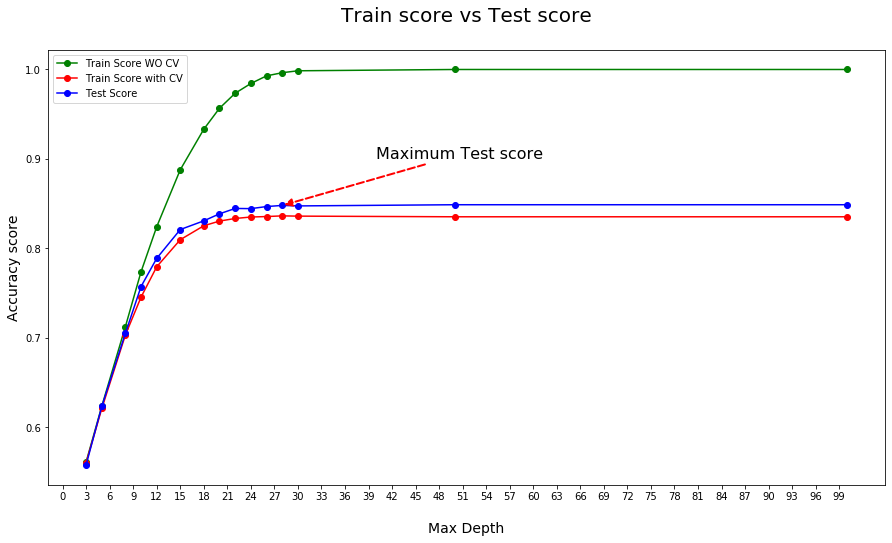

In [34]:
plt.figure(figsize=(15,8))
x_axis = [3,5,8,10,12,15,18,20,22,24,26,28,30,50,100]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score WO CV',marker='o')
plt.plot(x_axis, train_cv_array, c = 'r', label = 'Train Score with CV',marker='o')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('Train score vs Test score\n',fontsize=20)
plt.xlabel('\nMax Depth',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.xticks(np.arange(0, 100,3))
plt.annotate("Maximum Test score",fontsize=16,xy=(28, 0.8479),xytext=(40, 0.90), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.show()

#### Train the model with the best parameter

In [35]:
dtree = DecisionTreeClassifier(max_depth=28,random_state=999)
scores = cross_val_score(dtree, x_train, y_train, cv=5)
print('\nFor Max depth =',30)
print('\nThe cross validation scores for 5 folds is: ',scores)
print('\nCross validation Test score mean:',scores.mean())
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print('Training score without CV       :',dtree.score(x_train,y_train).round(5))
print('Test score without CV           :',dtree.score(x_test,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For Max depth = 30

The cross validation scores for 5 folds is:  [0.84348341 0.83659201 0.83475581 0.83234527 0.83410411]

Cross validation Test score mean: 0.8362561235939676
Training score without CV       : 0.9964
Test score without CV           : 0.84795

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2451,505,5,0,40,7,128
2,551,1789,50,0,154,56,16
3,2,34,2987,63,25,293,0
4,0,0,70,609,0,40,0
5,25,107,26,0,2173,19,0
6,4,46,284,50,28,2608,0
7,113,7,0,0,1,0,2713



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.78      0.78      0.78      3136
           2       0.72      0.68      0.70      2616
           3       0.87      0.88      0.88      3404
           4       0.84      0.85      0.85       719
           5       0.90      0.92      0.91      2350
           6       0.86      0.86      0.86      3020
           7       0.95      0.96      0.95      2834

    accuracy                           0.85     18079
   macro avg       0.85      0.85      0.85     18079
weighted avg       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------


#### Plotting the decision region

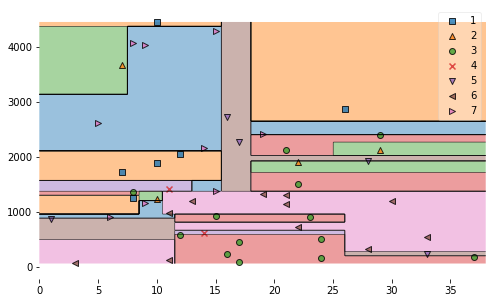

In [39]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train.iloc[100:150,[2,5]].values
y_b = y_train[100:150].values
dtree = DecisionTreeClassifier(max_depth=28,random_state=999)
dtree.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = dtree)

# Random forest

Same as Decision trees here also we will be using the unscaled data for modelling and using the same range of max_depth (in decision trees) to reduce the computational time with Gini score as the measurement of impurity in nodes rather than Entropy and Information gain

Here also we will be using Crossvalidation alone instead of GridsearchCV as we need to see the results of recall score and confusion matrix to decide upon the parameteres (mostly because the computational time of for loops with CV is lesser than Gridserach with CV and by default itself the random forest is tedious Algorithm which takes more computaitonal time we will stick with for loop CV as of now)

In [16]:
train_cv_array=[]
train_score_array = []
test_score_array = []

from sklearn.ensemble import RandomForestClassifier
for n in [100,200,300,350,400,450]:
    for d in [20,25,28,35,50]:
        rftree = RandomForestClassifier(n_jobs=-1,random_state=42,criterion='gini',n_estimators=n,max_depth=d)
        scores = cross_val_score(rftree, x_train, y_train, cv=5)
        print('\nFor n_estimator = ',n,' and For maxdepth =',d)
        print('\nCross validation Testing mean:',scores.mean())
        rftree.fit(x_train,y_train)
        y_pred=rftree.predict(x_test)
        train_score_array.append(rftree.score(x_train, y_train))
        test_score_array.append(rftree.score(x_test, y_test))
        train_cv_array.append(scores.mean())
        print('Training score without CV:',rftree.score(x_train, y_train))
        print('Test score -->',rftree.score(x_test, y_test))
        print('\nThe Confusion Matrix is plotted below:')
        display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
        print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
        print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
              f1_score(y_test, y_pred, average='micro').round(2) )
        print('--------------------------------------------------------------------------')
    


For n_estimator =  100  and For maxdepth = 20

Cross validation Testing mean: 0.8828172577906581
Training score without CV: 0.9881466028163671
Test score --> 0.8890978483323193

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2664,313,1,0,45,7,106
2,467,1879,61,0,137,58,14
3,0,6,3059,45,13,281,0
4,0,0,59,637,0,23,0
5,3,33,22,0,2275,17,0
6,0,7,186,30,11,2786,0
7,58,2,0,0,0,0,2774



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.83      0.85      0.84      3136
           2       0.84      0.72      0.77      2616
           3       0.90      0.90      0.90      3404
           4       0.89      0.89      0.89       719
           5       0.92      0.97      0.94      2350
           6       0.88      0.92      0.90      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.89     18079
   macro avg       0.89      0.89      0.89     18079
weighted avg       0.89      0.89      0.89     18079

   micro avg	   0.89      0.89      0.89
--------------------------------------------------------------------------

For n_estimator =  100  and For maxdepth = 25

Cross validation Testing mean: 0.893698519013425
Training score without CV: 0.9990991418140439
Test score --> 0.9038663642900603

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2696,304,1,0,24,7,104
2,406,1982,55,0,113,49,11
3,0,5,3104,42,9,244,0
4,0,0,49,647,0,23,0
5,5,22,16,0,2294,13,0
6,0,5,153,23,7,2832,0
7,45,3,0,0,0,0,2786



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.76      0.80      2616
           3       0.92      0.91      0.92      3404
           4       0.91      0.90      0.90       719
           5       0.94      0.98      0.96      2350
           6       0.89      0.94      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  100  and For maxdepth = 28

Cross validation Testing mean: 0.8956426528455708
Training score without CV: 0.9997866388506946
Test score --> 0.9018751037114885

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2683,311,2,0,28,4,108
2,415,1978,56,0,101,54,12
3,0,5,3112,46,10,231,0
4,0,0,51,648,0,20,0
5,4,30,19,0,2285,12,0
6,0,4,170,28,7,2811,0
7,44,1,0,0,1,0,2788



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.85      3136
           2       0.85      0.76      0.80      2616
           3       0.91      0.91      0.91      3404
           4       0.90      0.90      0.90       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.91      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  100  and For maxdepth = 35

Cross validation Testing mean: 0.8965195621025369
Training score without CV: 1.0
Test score --> 0.9027047956192267

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2696,301,2,0,26,5,106
2,416,1976,55,0,101,52,16
3,0,5,3124,43,8,224,0
4,0,0,52,646,0,21,0
5,4,26,20,0,2290,10,0
6,0,6,178,27,5,2804,0
7,46,4,0,0,0,0,2784



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.86      3136
           2       0.85      0.76      0.80      2616
           3       0.91      0.92      0.91      3404
           4       0.90      0.90      0.90       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.91      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  100  and For maxdepth = 50

Cross validation Testing mean: 0.8973493365999934
Training score without CV: 1.0
Test score --> 0.9046407434039493

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2704,297,2,0,25,5,103
2,413,1990,49,0,97,52,15
3,0,5,3120,43,9,227,0
4,0,0,47,653,0,19,0
5,4,25,19,0,2290,12,0
6,0,6,177,26,5,2806,0
7,39,3,0,0,0,0,2792



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.86      0.76      0.81      2616
           3       0.91      0.92      0.92      3404
           4       0.90      0.91      0.91       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.91      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.91      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 20

Cross validation Testing mean: 0.884405472108788
Training score without CV: 0.9878147076952255
Test score --> 0.8914209856739864

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2672,303,1,0,47,6,107
2,462,1891,57,0,137,55,14
3,0,6,3065,44,12,277,0
4,0,0,53,644,0,22,0
5,5,32,19,0,2278,16,0
6,0,5,184,28,11,2792,0
7,57,3,0,0,0,0,2774



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.84      0.85      0.84      3136
           2       0.84      0.72      0.78      2616
           3       0.91      0.90      0.90      3404
           4       0.90      0.90      0.90       719
           5       0.92      0.97      0.94      2350
           6       0.88      0.92      0.90      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.89     18079
   macro avg       0.89      0.89      0.89     18079
weighted avg       0.89      0.89      0.89     18079

   micro avg	   0.89      0.89      0.89
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 25

Cross validation Testing mean: 0.894623307760346
Training score without CV: 0.9993125029633493
Test score --> 0.9033132363515681

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2692,307,2,0,26,6,103
2,416,1971,55,0,113,46,15
3,0,4,3105,42,10,243,0
4,0,0,50,653,0,16,0
5,5,20,17,0,2297,11,0
6,0,6,157,26,6,2825,0
7,43,3,0,0,0,0,2788



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.86      3136
           2       0.85      0.75      0.80      2616
           3       0.92      0.91      0.91      3404
           4       0.91      0.91      0.91       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.94      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 28

Cross validation Testing mean: 0.8978710231575869
Training score without CV: 0.9997866388506946
Test score --> 0.9031472979700205

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2693,303,2,0,27,4,107
2,413,1974,57,0,108,50,14
3,0,5,3107,48,9,235,0
4,0,0,48,655,0,16,0
5,4,27,18,0,2288,13,0
6,0,5,161,27,6,2821,0
7,41,3,0,0,0,0,2790



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.86      3136
           2       0.85      0.75      0.80      2616
           3       0.92      0.91      0.91      3404
           4       0.90      0.91      0.90       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 35

Cross validation Testing mean: 0.8983450214087731
Training score without CV: 1.0
Test score --> 0.9050279329608939

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2699,303,3,0,22,5,104
2,398,2001,50,0,102,51,14
3,0,5,3124,44,10,221,0
4,0,0,50,648,0,21,0
5,5,28,20,0,2287,10,0
6,0,6,171,27,4,2812,0
7,39,3,0,0,1,0,2791



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.76      0.81      2616
           3       0.91      0.92      0.92      3404
           4       0.90      0.90      0.90       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.91      0.90     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 50

Cross validation Testing mean: 0.898107984412215
Training score without CV: 1.0
Test score --> 0.9056916864870844

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2701,298,2,0,20,5,110
2,403,1997,53,0,98,50,15
3,0,5,3125,43,8,223,0
4,0,0,47,654,0,18,0
5,4,22,17,0,2295,12,0
6,0,6,168,28,4,2814,0
7,42,4,0,0,0,0,2788



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.86      0.76      0.81      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.91      0.91       719
           5       0.95      0.98      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.91      0.91      0.91     18079
weighted avg       0.90      0.91      0.90     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 20

Cross validation Testing mean: 0.8849980071022341
Training score without CV: 0.9885022047318761
Test score --> 0.8905359809723989

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2663,309,1,0,47,6,110
2,456,1894,56,0,135,58,17
3,0,5,3056,46,12,285,0
4,0,0,52,643,0,24,0
5,6,33,22,0,2274,15,0
6,0,7,180,28,11,2794,0
7,56,2,0,0,0,0,2776



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.84      0.85      0.84      3136
           2       0.84      0.72      0.78      2616
           3       0.91      0.90      0.90      3404
           4       0.90      0.89      0.90       719
           5       0.92      0.97      0.94      2350
           6       0.88      0.93      0.90      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.89     18079
   macro avg       0.89      0.89      0.89     18079
weighted avg       0.89      0.89      0.89     18079

   micro avg	   0.89      0.89      0.89
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 25

Cross validation Testing mean: 0.8958559145217986
Training score without CV: 0.999288796168982
Test score --> 0.903257923557719

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2689,310,2,0,25,4,106
2,409,1971,57,0,117,47,15
3,0,4,3111,43,10,236,0
4,0,0,49,651,0,19,0
5,4,21,19,0,2293,13,0
6,0,6,161,25,6,2822,0
7,39,2,0,0,0,0,2793



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.75      0.80      2616
           3       0.92      0.91      0.91      3404
           4       0.91      0.91      0.91       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 28

Cross validation Testing mean: 0.898677137448549
Training score without CV: 0.9998577592337964
Test score --> 0.903257923557719

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2692,303,2,0,27,4,108
2,413,1980,57,0,105,47,14
3,0,5,3111,45,10,233,0
4,0,0,49,652,0,18,0
5,4,24,21,0,2289,12,0
6,0,6,168,26,5,2815,0
7,41,1,0,0,1,0,2791



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.86      3136
           2       0.85      0.76      0.80      2616
           3       0.91      0.91      0.91      3404
           4       0.90      0.91      0.90       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 35

Cross validation Testing mean: 0.899767454529431
Training score without CV: 1.0
Test score --> 0.9054704353116876

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2699,302,2,0,20,5,108
2,402,1993,54,0,104,49,14
3,0,4,3123,43,10,224,0
4,0,0,49,650,0,20,0
5,5,25,20,0,2288,12,0
6,0,6,159,27,4,2824,0
7,38,2,0,0,1,0,2793



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.76      0.81      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.90      0.90       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.94      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.90      0.91      0.90     18079
weighted avg       0.90      0.91      0.90     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 50

Cross validation Testing mean: 0.898771660024949
Training score without CV: 1.0
Test score --> 0.9060235632501797

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2705,294,2,0,21,5,109
2,399,1998,55,0,100,49,15
3,0,5,3125,44,10,220,0
4,0,0,46,656,0,17,0
5,6,25,18,0,2289,12,0
6,0,6,164,27,4,2819,0
7,43,3,0,0,0,0,2788



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.86      0.76      0.81      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.91      0.91       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.91      0.91      0.91     18079
weighted avg       0.90      0.91      0.90     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For n_estimator =  350  and For maxdepth = 20

Cross validation Testing mean: 0.8851877097977067
Training score without CV: 0.9886207387037125
Test score --> 0.8915316112616848

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2665,307,1,0,46,6,111
2,452,1901,56,0,134,58,15
3,0,5,3062,44,13,280,0
4,0,0,53,643,0,23,0
5,5,32,23,0,2275,15,0
6,0,7,179,28,11,2795,0
7,55,2,0,0,0,0,2777



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.84      0.85      0.84      3136
           2       0.84      0.73      0.78      2616
           3       0.91      0.90      0.90      3404
           4       0.90      0.89      0.90       719
           5       0.92      0.97      0.94      2350
           6       0.88      0.93      0.90      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.89     18079
   macro avg       0.89      0.89      0.89     18079
weighted avg       0.89      0.89      0.89     18079

   micro avg	   0.89      0.89      0.89
--------------------------------------------------------------------------

For n_estimator =  350  and For maxdepth = 25

Cross validation Testing mean: 0.8960930555021397
Training score without CV: 0.9992650893746148
Test score --> 0.9033685491454173

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2693,305,2,0,25,4,107
2,416,1967,56,0,116,47,14
3,0,4,3114,44,11,231,0
4,0,0,49,650,0,20,0
5,4,20,20,0,2293,13,0
6,0,6,161,26,6,2821,0
7,38,2,0,0,0,0,2794



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.86      3136
           2       0.85      0.75      0.80      2616
           3       0.92      0.91      0.92      3404
           4       0.90      0.90      0.90       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  350  and For maxdepth = 28

Cross validation Testing mean: 0.8988668036140908
Training score without CV: 0.9999051728225309
Test score --> 0.9039216770839095

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2691,301,2,0,27,4,111
2,417,1978,56,0,104,48,13
3,0,4,3112,46,11,231,0
4,0,0,48,655,0,16,0
5,5,23,19,0,2291,12,0
6,0,6,160,26,6,2822,0
7,38,3,0,0,0,0,2793



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.86      3136
           2       0.85      0.76      0.80      2616
           3       0.92      0.91      0.92      3404
           4       0.90      0.91      0.91       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  350  and For maxdepth = 35

Cross validation Testing mean: 0.8989614133023188
Training score without CV: 1.0
Test score --> 0.9043641794347033

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2691,305,2,0,22,6,110
2,406,1988,53,0,106,49,14
3,0,4,3116,43,10,231,0
4,0,0,50,650,0,19,0
5,5,25,20,0,2289,11,0
6,0,5,162,27,5,2821,0
7,36,3,0,0,0,0,2795



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.76      0.80      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.90      0.90       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  350  and For maxdepth = 50

Cross validation Testing mean: 0.8987954719171837
Training score without CV: 1.0
Test score --> 0.9053598097239891

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2698,300,2,0,21,5,110
2,403,1998,57,0,97,47,14
3,0,5,3118,47,10,224,0
4,0,0,48,653,0,18,0
5,6,23,19,0,2290,12,0
6,0,5,164,27,4,2820,0
7,40,3,0,0,0,0,2791



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.86      0.76      0.81      2616
           3       0.91      0.92      0.92      3404
           4       0.90      0.91      0.90       719
           5       0.95      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.90      0.91      0.90     18079
weighted avg       0.90      0.91      0.90     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For n_estimator =  400  and For maxdepth = 20

Cross validation Testing mean: 0.8853063730376769
Training score without CV: 0.9888103930586506
Test score --> 0.8919188008186294

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2670,303,1,0,45,7,110
2,456,1895,57,0,135,58,15
3,0,4,3065,47,13,275,0
4,0,0,53,646,0,20,0
5,5,31,24,0,2275,15,0
6,0,7,175,28,11,2799,0
7,57,2,0,0,0,0,2775



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.84      0.85      0.84      3136
           2       0.85      0.72      0.78      2616
           3       0.91      0.90      0.90      3404
           4       0.90      0.90      0.90       719
           5       0.92      0.97      0.94      2350
           6       0.88      0.93      0.90      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.89     18079
   macro avg       0.89      0.89      0.89     18079
weighted avg       0.89      0.89      0.89     18079

   micro avg	   0.89      0.89      0.89
--------------------------------------------------------------------------

For n_estimator =  400  and For maxdepth = 25

Cross validation Testing mean: 0.895927066339109
Training score without CV: 0.9992413825802475
Test score --> 0.9032026107638697

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2690,313,2,0,22,5,104
2,415,1967,57,0,115,48,14
3,0,4,3112,43,11,234,0
4,0,0,50,649,0,20,0
5,4,19,20,0,2294,13,0
6,0,6,159,25,6,2824,0
7,39,2,0,0,0,0,2793



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.86      3136
           2       0.85      0.75      0.80      2616
           3       0.92      0.91      0.91      3404
           4       0.91      0.90      0.90       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.94      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  400  and For maxdepth = 28

Cross validation Testing mean: 0.8987720843360831
Training score without CV: 0.9998814660281636
Test score --> 0.9037557387023618

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2688,305,2,0,27,4,110
2,416,1980,56,0,104,47,13
3,0,4,3113,44,11,232,0
4,0,0,48,654,0,17,0
5,5,23,20,0,2290,12,0
6,0,6,159,27,6,2822,0
7,39,2,0,0,1,0,2792



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.85      0.86      0.86      3136
           2       0.85      0.76      0.80      2616
           3       0.92      0.91      0.92      3404
           4       0.90      0.91      0.91       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  400  and For maxdepth = 35

Cross validation Testing mean: 0.8989849076432126
Training score without CV: 1.0
Test score --> 0.9046960561977986

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2690,305,2,0,22,6,111
2,406,1991,53,0,104,48,14
3,0,4,3119,43,10,228,0
4,0,0,49,650,0,20,0
5,5,22,20,0,2292,11,0
6,0,6,161,27,5,2821,0
7,38,3,0,0,0,0,2793



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.76      0.80      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.90      0.90       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  400  and For maxdepth = 50

Cross validation Testing mean: 0.8987954410272275
Training score without CV: 1.0
Test score --> 0.9063001272194259

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2700,297,2,0,23,5,109
2,400,2002,54,0,100,46,14
3,0,5,3118,46,9,226,0
4,0,0,45,655,0,19,0
5,6,21,19,0,2292,12,0
6,0,6,155,26,5,2828,0
7,41,3,0,0,0,0,2790



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.86      0.77      0.81      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.91      0.91       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.94      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.91      0.91      0.91     18079
weighted avg       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For n_estimator =  450  and For maxdepth = 20

Cross validation Testing mean: 0.8857091969676147
Training score without CV: 0.9888103930586506
Test score --> 0.8914209856739864

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2665,306,1,0,46,7,111
2,455,1893,57,0,138,58,15
3,0,4,3069,44,12,275,0
4,0,0,54,643,0,22,0
5,5,33,22,0,2275,15,0
6,0,6,179,27,12,2796,0
7,57,2,0,0,0,0,2775



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.84      0.85      0.84      3136
           2       0.84      0.72      0.78      2616
           3       0.91      0.90      0.90      3404
           4       0.90      0.89      0.90       719
           5       0.92      0.97      0.94      2350
           6       0.88      0.93      0.90      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.89     18079
   macro avg       0.89      0.89      0.89     18079
weighted avg       0.89      0.89      0.89     18079

   micro avg	   0.89      0.89      0.89
--------------------------------------------------------------------------

For n_estimator =  450  and For maxdepth = 25

Cross validation Testing mean: 0.8961166987707294
Training score without CV: 0.9993362097577165
Test score --> 0.9038110514962111

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2689,312,2,0,22,5,106
2,410,1970,58,0,116,48,14
3,0,4,3118,41,8,233,0
4,0,0,48,654,0,17,0
5,4,20,20,0,2293,13,0
6,0,6,157,26,6,2825,0
7,41,2,0,0,0,0,2791



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.75      0.80      2616
           3       0.92      0.92      0.92      3404
           4       0.91      0.91      0.91       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.94      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  450  and For maxdepth = 28

Cross validation Testing mean: 0.8989380116972342
Training score without CV: 0.9998814660281636
Test score --> 0.9038663642900603

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2690,304,2,0,25,4,111
2,412,1984,55,0,105,47,13
3,0,4,3108,47,10,235,0
4,0,0,49,654,0,16,0
5,5,23,20,0,2290,12,0
6,0,6,159,26,6,2823,0
7,39,3,0,0,0,0,2792



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.76      0.80      2616
           3       0.92      0.91      0.91      3404
           4       0.90      0.91      0.90       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.90     18079
   macro avg       0.90      0.90      0.90     18079
weighted avg       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------

For n_estimator =  450  and For maxdepth = 35

Cross validation Testing mean: 0.8994591222859425
Training score without CV: 1.0
Test score --> 0.9055810608993861

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2688,311,2,0,19,6,110
2,398,2001,53,0,103,47,14
3,0,4,3121,42,10,227,0
4,0,0,49,651,0,19,0
5,5,20,20,0,2294,11,0
6,0,5,160,27,5,2823,0
7,37,3,0,0,0,0,2794



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.85      0.76      0.81      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.91      0.90       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.93      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.91      0.91      0.91     18079
weighted avg       0.90      0.91      0.90     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For n_estimator =  450  and For maxdepth = 50

Cross validation Testing mean: 0.8988190786898217
Training score without CV: 1.0
Test score --> 0.9061895016317274

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2698,300,2,0,23,5,108
2,398,2005,55,0,99,45,14
3,0,5,3115,47,10,227,0
4,0,0,45,655,0,19,0
5,6,22,19,0,2291,12,0
6,0,6,158,26,4,2826,0
7,38,3,0,0,0,0,2793



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.86      0.77      0.81      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.91      0.91       719
           5       0.94      0.97      0.96      2350
           6       0.90      0.94      0.92      3020
           7       0.96      0.99      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.91      0.91      0.91     18079
weighted avg       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------


From the above results we can see that the ebst estimators are n_estimator =  400  and maxdepth = 50 which yeilds an accuracy score of 0.9063 and micro avg recall score of 0.91

#### Train the model with the best parameter

In [17]:
rftree = RandomForestClassifier(n_jobs=-1,random_state=42,criterion='gini',n_estimators=400,max_depth=50)
scores = cross_val_score(rftree, x_train, y_train, cv=5)
print('\nFor n_estimator = ',400,' and For maxdepth =',50)
print('\nCross validation Testing scores:',scores)
print('\nCross validation Testing mean:',scores.mean())
rftree.fit(x_train,y_train)
y_pred=rftree.predict(x_test)
print('Training score without CV:',rftree.score(x_train, y_train))
print('Test score -->',rftree.score(x_test, y_test))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')


For n_estimator =  400  and For maxdepth = 50

Cross validation Testing scores: [0.90154028 0.89844768 0.89829303 0.89388191 0.9018143 ]

Cross validation Testing mean: 0.8987954410272275
Training score without CV: 1.0
Test score --> 0.9063001272194259

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2700,297,2,0,23,5,109
2,400,2002,54,0,100,46,14
3,0,5,3118,46,9,226,0
4,0,0,45,655,0,19,0
5,6,21,19,0,2292,12,0
6,0,6,155,26,5,2828,0
7,41,3,0,0,0,0,2790



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           1       0.86      0.86      0.86      3136
           2       0.86      0.77      0.81      2616
           3       0.92      0.92      0.92      3404
           4       0.90      0.91      0.91       719
           5       0.94      0.98      0.96      2350
           6       0.90      0.94      0.92      3020
           7       0.96      0.98      0.97      2834

    accuracy                           0.91     18079
   macro avg       0.91      0.91      0.91     18079
weighted avg       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------


#### Plotting the decision region

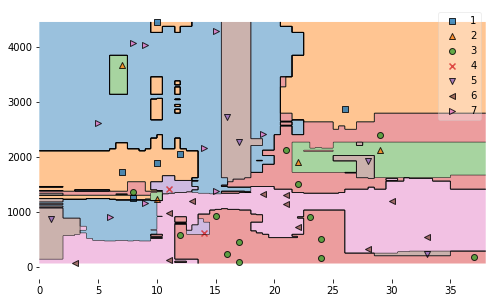

In [18]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train.iloc[100:150,[2,5]].values
y_b = y_train[100:150].values
rftree = RandomForestClassifier(n_jobs=-1,random_state=42,criterion='gini',n_estimators=400,max_depth=50)
rftree.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = rftree)

#  STOCHASTIC GRADIENT BOOSTING

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
train_cv_array=[]
train_score_array = []
test_score_array = []

from sklearn.ensemble import GradientBoostingClassifier
sgb=GradientBoostingClassifier(learning_rate=1.5,n_estimators=400,subsample=0.8,max_depth=75,random_state=999,max_features='sqrt')
scores= cross_val_score(sgb, x_train, y_train, cv=3)
print('\nFor n_estimator = ',400,' and For maxdepth =',75,'and Learning rate = ',1.5)
print('\nCross validation Testing mean:',scores.mean())
sgb.fit(x_train,y_train)
y_pred=sgb.predict(x_test)
train_score_array.append(sgb.score(x_train, y_train))
test_score_array.append(sgb.score(x_test, y_test))
train_cv_array.append(scores.mean())
print('Training score without CV:',sgb.score(x_train, y_train))
print('Test score -->',sgb.score(x_test, y_test))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For n_estimator =  400  and For maxdepth = 75 and Learning rate =  1.5

Cross validation Testing mean: 0.8373005348742577


#### Now, we need to compare all the models to find which model best classifies the data well

In [3]:
#Gathering all model's split scores in Cross validation when trained with its Best parameters
model_scores={'Split 1':[0.15847,0.85319905,0.67808057,0.63957346,0.6785545,0.86646919,0.84348341,0.90154028],
             'Split 2':[0.15847,0.85389264,0.68218983,0.64818106,0.69723901,0.87368172,0.83659201,0.89844768],
             'Split 3':[0.15847,0.84376482,0.68065434,0.64295875,0.69345661,0.8667615,0.83475581,0.89829303],
             'Split 4':[0.15847,0.85238321,0.67536163,0.64595684,0.69290965,0.87099834,0.83234527,0.89388191],
             'Split 5':[0.15847,0.8530772,0.68801138,0.65753587,0.69548203,0.86967864,0.83410411,0.9018143]}

In [6]:
model_df= pd.DataFrame(model_scores,index=['Dummy classifier','KNeighborsClassifier','LogisticRegression','LinearSVC','SVC-Linear Kernal','SVC-Radial Bias Kernal','Decision Trees','Random Forest'])
display(model_df)

,Split 1,Split 2,Split 3,Split 4,Split 5
Dummy classifier,0.158470,0.158470,0.158470,0.158470,0.158470
KNeighborsClassifier,0.853199,0.853893,0.843765,0.852383,0.853077
LogisticRegression,0.678081,0.682190,0.680654,0.675362,0.688011
LinearSVC,0.639573,0.648181,0.642959,0.645957,0.657536
SVC-Linear Kernal,0.678554,0.697239,0.693457,0.692910,0.695482
SVC-Radial Bias Kernal,0.866469,0.873682,0.866761,0.870998,0.869679
Decision Trees,0.843483,0.836592,0.834756,0.832345,0.834104
Random Forest,0.901540,0.898448,0.898293,0.893882,0.901814


In [11]:
model_df.iloc[0,:]

Split 1    0.15847
Split 2    0.15847
Split 3    0.15847
Split 4    0.15847
Split 5    0.15847
Name: Dummy classifier, dtype: float64

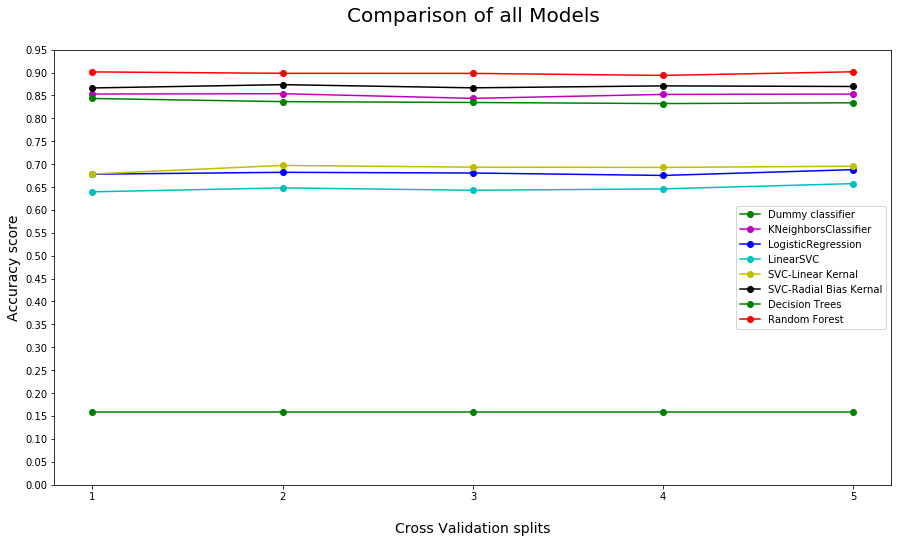

In [21]:
plt.figure(figsize=(15,8))
x_axis = [1,2,3,4,5]
plt.plot(x_axis, model_df.iloc[0,:], c = 'g', label = 'Dummy classifier',marker='o')
plt.plot(x_axis, model_df.iloc[1,:], c = 'm', label = 'KNeighborsClassifier',marker='o')
plt.plot(x_axis, model_df.iloc[2,:], c = 'b', label = 'LogisticRegression',marker='o')
plt.plot(x_axis, model_df.iloc[3,:], c = 'c', label = 'LinearSVC',marker='o')
plt.plot(x_axis, model_df.iloc[4,:], c = 'y', label = 'SVC-Linear Kernal',marker='o')
plt.plot(x_axis, model_df.iloc[5,:], c = 'k', label = 'SVC-Radial Bias Kernal',marker='o')
plt.plot(x_axis, model_df.iloc[6,:], c = 'g', label = 'Decision Trees',marker='o')
plt.plot(x_axis, model_df.iloc[7,:], c = 'r', label = 'Random Forest',marker='o')
plt.legend(loc='best')
plt.title('Comparison of all Models\n',fontsize=20)
plt.xlabel('\nCross Validation splits',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.xticks(np.arange(1,6,1))
plt.yticks(np.arange(0,1.0,0.05))
#plt.annotate("Maximum Test score",fontsize=16,xy=(28, 0.8479),xytext=(40, 0.90), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.show()

## From the above visualization we can see that the Random Forest is at the top with the Accuracy score of 0.91 and then the SVC with RBF kernal as the second with the accuracy score of 0.87958 

## Thus, we can conclude that the best models are both the Random Forest and SVC with Radial Bias Funciton Kernal 